<p style="font-size:25px; color:green; font-weight:bold;">Pre-processing the data for Multimodal movie genre prediction </p>

In [ ]:
# Downloading the dataseet from Kaggle
!kaggle datasets download -d rounakbanik/the-movies-dataset

In [ ]:
# Importing the required imports
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
100%|████████████████████████████████████████| 228M/228M [00:58<00:00, 2.91MB/s]
100%|████████████████████████████████████████| 228M/228M [00:58<00:00, 4.07MB/s]


In [ ]:
subset_data = source_data.filter(['id', 'original_title', 'overview', 'genres', 'genre_list'], axis=1)
print("subset_data length is:", len(subset_data))

subset_data length is: 45466


In [ ]:
# Reading the downloaded data
source_data = pd.read_csv(r"C:\Users\Lenovo\IdeaProjects\Data_Science_Project\data_science_project\the-movies-dataset\movies_metadata.csv")
pd.set_option('display.max_columns', None)
source_data.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22116\4261904129.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv(r"C:\Users\Lenovo\IdeaProjects\Data_Science_Project\data_science_project\the-movies-dataset\movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# Taking a look at the subsetted data
subset_data

,id,original_title,overview,genres
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...,...
45461,439050,رگ خواب,Rising and falling between a man and woman.,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,"[{'id': 18, 'name': 'Drama'}]"
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona...","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis...",[]


In [ ]:
# Converting the genre column into a list to find  all the individual genre's count
found_genres = subset_data['genres'].tolist()
found_genres

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [ ]:
genre_per_movie = []
genre_dict = {}

# creating a list of genres that are not commonly used genres
invalid_genres = ['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands', 'Mardock Scramble Production Committee', 
                  'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Sentai Filmworks','Telescene Film Group Productions', 
                  'The Cartel', 'Vision View Entertainment', 'TV Movie', 'Foreign']
for genre in found_genres:
  genre = ast.literal_eval(genre)
  genre_list = []
  for val in genre:
    if val['name'] not in invalid_genres:
      genre_list.append(val['name'])
      if val['name'] in genre_dict:
        genre_dict[val['name']] += 1
      else:
        genre_dict[val['name']] = 1
  genre_per_movie.append(genre_list)
genre_dict = {key:val for key, val in genre_dict.items() if val != 1}
genre_dict

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [ ]:
# Sorting the genre dictionary in ascending order based on the value
genre_dict_sorted = dict(sorted(genre_dict.items(), key=lambda item: item[1]))
genre_dict_sorted

{'Western': 1042,
 'War': 1323,
 'History': 1398,
 'Music': 1598,
 'Animation': 1935,
 'Fantasy': 2313,
 'Mystery': 2467,
 'Family': 2770,
 'Science Fiction': 3049,
 'Adventure': 3496,
 'Documentary': 3932,
 'Crime': 4307,
 'Horror': 4673,
 'Action': 6596,
 'Romance': 6735,
 'Thriller': 7624,
 'Comedy': 13182,
 'Drama': 20265}

In [ ]:
# Creating two seperate lists from the dictionary for plotting them on a graph
keys = list(genre_dict_sorted.keys())
values = list(genre_dict_sorted.values())

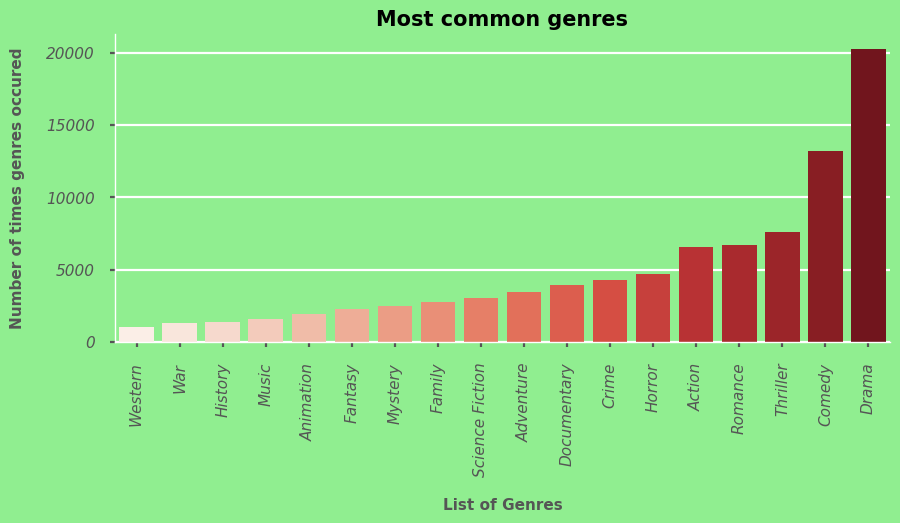

In [ ]:
style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))  
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')

sns.barplot(x=keys, y=values, palette="Reds") 
sns.despine(top=True) 

plt.title("Most common genres", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')  
plt.ylabel('Number of times genres occured', size=11, labelpad=15, fontweight='bold') 
plt.xticks(size=11, rotation=90, style='italic')  
plt.yticks(size=11, style='italic')  

plt.show()  


In [ ]:
# Inserting the genre list to the source data dataframe
subset_data['genre_list'] = genre_per_movie
subset_data.head()     

,id,original_title,overview,genres,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]


In [ ]:
subset_data

,id,original_title,overview,genres,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
...,...,...,...,...,...
45461,439050,رگ خواب,Rising and falling between a man and woman.,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[Drama, Family]"
45462,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,"[{'id': 18, 'name': 'Drama'}]",[Drama]
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona...","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[Action, Drama, Thriller]"
45464,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis...",[],[]


In [ ]:
# Counting the non-empty genre_list 
subset_data = subset_data[subset_data['genre_list'].map(lambda d: len(d)) > 0]
print("Counting the non-empty genre_list values:", len(subset_data))

Counting the non-empty genre_list values: 42995


In [ ]:
empty_count = 0
for genre in genre_per_movie:
  if not len(genre):
    empty_count += 1
print("Counting the total empty count in genre_list:", empty_count)

Counting the total empty count in genre_list: 2471


<p style="font-size:25px; color:green; font-weight:bold;"> Using TMDb API to download the movie posters </p>

In [ ]:
!pip install tmdbv3api

from bs4 import BeautifulSoup
import os    
import requests
from tmdbv3api import Movie
from tmdbv3api import TMDb

# Instalising the TMDb API
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'

In [ ]:
# # Creating a function to download the posters 
# def get_movie_posters(url, name):
#   try:
#     baseurl = 'http://image.tmdb.org/t/p/w185'
#     link = baseurl + url
#     img = requests.get(link).content
#     name = name.replace('/', '_')
#     file_name = str(name) + ".jpg"
#     path = os.path.join('C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters', file_name)
#     with open(path, 'wb') as handler:
#       handler.write(img)
#     return path
#   except Exception as e:
#     print('[ERROR]', str(e))
#     return "Error"

# poster_paths = []
# movie = Movie()

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#   m = movie.details(int(id))
#   print('Downloading:', name, "i", i)
#   try:
#     poster_paths.append(get_movie_posters(m.poster_path, name))
#   except Exception as e:
#     print('[ERROR]', str(e))
#     poster_paths.append("API Error")
#   i += 1

# print(len(poster_paths))    

In [ ]:
# import os
# from tmdbv3api import TMDb, Movie

# # Function to download posters (dummy implementation)
# def get_posters(base_url, poster_path, name):
#     import requests
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"
#     path = os.path.join(download_path, file_name)
    
#     if os.path.exists(path):
#         return path  # Skip download if file already exists

#     full_url = base_url + poster_path
#     response = requests.get(full_url)
#     if response.status_code == 200:
#         with open(path, 'wb') as f:
#             f.write(response.content)
#         return path
#     else:
#         raise Exception(f"Failed to download poster for {name}")

# # Initialize TMDb and Movie objects
# tmdb = TMDb()
# tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
# movie = Movie()

# # Base URL for TMDb images
# base_url = "http://image.tmdb.org/t/p/original"

# Track existing downloaded files
# download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'
# downloaded_files = {name.replace('/', '_') + ".jpg" for name in os.listdir(download_path)}

# poster_paths = []

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"

#     if file_name in downloaded_files:
#         print(f"Skipping {name}, already downloaded.")
#         poster_paths.append(os.path.join(download_path, file_name))
#         continue

#     try:
#         m = movie.details(int(id))
#         print('Downloading:', name, "i", i)
#         poster_path = get_posters(base_url, m.poster_path, name)
#         poster_paths.append(poster_path)
#     except Exception as e:
#         error_message = str(e)
#         if "The resource you requested could not be found" in error_message:
#             print('[TMDb ERROR]', error_message)
#             poster_paths.append("TMDb Error")
#         else:
#             print('[ERROR]', error_message)
#             poster_paths.append("API Error")

#     i += 1
# print(len(poster_paths))


In [ ]:
import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))


Downloading: Dracula: Dead and Loving It i 12
Downloading: Ace Ventura: When Nature Calls i 19
Downloading: Across the Sea of Time i 37
[ERROR] can only concatenate str (not "NoneType") to str
Downloading: Lawnmower Man 2: Beyond Cyberspace i 65
Downloading: Heidi Fleiss: Hollywood Madam i 96
Downloading: Die Hard: With a Vengeance i 159
Downloading: Mighty Morphin Power Rangers: The Movie i 175
Downloading: Under Siege 2: Dark Territory i 198
Downloading: Far from Home: The Adventures of Yellow Dog i 231
Downloading: Gumby: The Movie i 237
Downloading: Poison Ivy II: Lily i 284
Downloading: Trois couleurs : Rouge i 299
Downloading: Trois couleurs : Bleu i 300
Downloading: Trois couleurs : Blanc i 301
Downloading: Tales from the Crypt: Demon Knight i 320
Downloading: Star Trek: Generations i 321
Downloading: Ace Ventura: Pet Detective i 336
Downloading: Die Macht der Bilder: Leni Riefenstahl i 355
Downloading: The Naked Gun 33⅓: The Final Insult i 362
Downloading: Boys Life: Three Stor

In [ ]:
poster_paths

['C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Toy Story.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Jumanji.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Grumpier Old Men.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Waiting to Exhale.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Father of the Bride Part II.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Heat.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Sabrina.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Tom and Huck.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Sudden D

In [ ]:
# Importing all the downloaded images
image_downloaded_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_poster_new'
poster_paths = [os.path.join(image_downloaded_path, f) for f in os.listdir(image_downloaded_path)]

# Creating new column for posters
subset_data['poster_paths'] = poster_paths

In [ ]:
print(len(subset_data))
print(len(subset_data[(subset_data['poster_paths'] == "API Error") | (subset_data['poster_paths'] == "Error")]))

In [ ]:
# Filtering out the poster paths which are not downaloaded because of API Error
subset_data = subset_data[subset_data['poster_paths'] != "API Error"]
print(len(subset_data))

# Filtering out the poster paths which are not downaloaded because of Error
subset_data = subset_data[subset_data['poster_paths'] != "Error"]
print(len(subset_data))

In [ ]:
subset_data.head()

,id,original_title,overview,genres,genre_list,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",C:/Users/Lenovo/IdeaProjects/Data_Science_Proj...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",C:/Users/Lenovo/IdeaProjects/Data_Science_Proj...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",C:/Users/Lenovo/IdeaProjects/Data_Science_Proj...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",C:/Users/Lenovo/IdeaProjects/Data_Science_Proj...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],C:/Users/Lenovo/IdeaProjects/Data_Science_Proj...


In [ ]:
# Saving the processed dataframe as a csv
subset_data.to_csv("C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_poster_new/dataset_mod.csv")

In [ ]:
data_with_genreAndPosters = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/dataset_mod.csv")

In [ ]:
data_with_genreAndPosters

,Unnamed: 0.1,Unnamed: 0,original_title,overview,id,genres,genre_list,poster_paths
0,0,0,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]","['Animation', 'Comedy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Toy Story.jpg
1,1,1,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]","['Adventure', 'Fantasy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jumanji.jpg
2,2,2,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]","['Romance', 'Comedy']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Grumpier Old Men.jpg
3,3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]","['Comedy', 'Drama', 'Romance']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Waiting to Exhale.jpg
4,4,4,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",11862,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Father of the Bride Part II.jpg
...,...,...,...,...,...,...,...,...
42990,42990,45459,Caged Heat 3000,"It's the year 3000 AD. The world's most dangerous women are banished to a remote asteroid 45 million light years from earth. Kira Murphy doesn't belong; wrongfully accused of a crime she did not commit, she's thrown in this interplanetary prison and left to her own defenses. But Kira's a fighter, and soon she finds herself in the middle of a female gang war; where everyone wants a piece of the action... and a piece of her! ""Caged Heat 3000"" takes the Women-in-Prison genre to a whole new level... and a whole new galaxy!",222848,"[{'id': 878, 'name': 'Science Fiction'}]",['Science Fiction'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Caged Heat 3000.jpg
42991,42991,45460,Robin Hood,"Yet another version of the classic epic, with enough variation to make it interesting. The story is the same, but some of the characters are quite different from the usual, in particular Uma Thurman's very special maid Marian. The photography is also great, giving the st

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_with_genreAndPosters, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(type(train), type(test), type(val))

val.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_data.csv")
test.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")
train.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
import cv2
import pandas as pd
import numpy as np  
from PIL import Image 

def resize_img(path):
  try:
    img = cv2.imread(path)
    img = cv2.resize(img, (75, 115))
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [ ]:
val = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

In [ ]:
pd.set_option('display.max_colwidth', None)
val['poster_paths']

0                         /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Butter Battle Book.jpg
1                          /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild Boys of the Road.jpg
2             /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Winnie the Pooh and the Honey Tree.jpg
3                                    /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unbreakable.jpg
4                                 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bloodsport III.jpg
                                                                       ...                                                                 
3435            /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sette winchester per un massacro.jpg
3436    /Users/ajayr

In [ ]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Butter Battle Book.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10 Length: 3439


[ WARN:0@0.483] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vesku.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.105] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Temptations.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 64 Length: 3438


[ WARN:0@1.343] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Field Full of Secrets.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 80 Length: 3437
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Final.jpg


[ WARN:0@1.919] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Freund.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 144 Length: 3436
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Du hast es versprochen.jpg


[ WARN:0@3.378] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sly Cooper.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 248 Length: 3435


[ WARN:0@3.750] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Coaching Colburn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 299 Length: 3434
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La escopeta nacional.jpg


[ WARN:0@4.501] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Generation Kill.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.662] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Men Cry Bullets.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 367 Length: 3433
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 380 Length: 3432


[ WARN:0@4.775] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svens Geheimnis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.846] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet Live.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4.970] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: Inner Circles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 390 Length: 3431
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet Live.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 400 Length: 3430
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 411 Length: 3429
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Melinda and Melinda.jpg


[ WARN:0@6.154] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 'Teddy' Bears.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 536 Length: 3428


[ WARN:0@6.431] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bianca Beauchamp: All Access.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 558 Length: 3427


[ WARN:0@6.667] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/O Mercado de Notícias.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.835] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alcina.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 581 Length: 3426
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 595 Length: 3425
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vlad Tepes.jpg


[ WARN:0@7.073] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Living with the Fosters.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Von einem, der auszog, das Fürchten zu lernen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 625 Length: 3424
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 645 Length: 3423


[ WARN:0@7.358] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Susan Calman: Lady Like.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 660 Length: 3422
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Comme tout le monde.jpg


[ WARN:0@8.709] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disaster Playground.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 760 Length: 3421


[ WARN:0@9.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/UltraMarathon Man: 50 Marathons, 50 States, 50 Days.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.065] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dante's Hell Animated.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 790 Length: 3420
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 797 Length: 3419
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cyber Wars.jpg


[ WARN:0@9.474] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thieving Hand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 842 Length: 3418


[ WARN:0@9.801] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Not an Exit: The Fictional World of Bret Easton Ellis.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 868 Length: 3417


[ WARN:0@10.056] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zombie Girl: The Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 894 Length: 3416
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fruit Hunters.jpg


[ WARN:0@10.506] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Allerleirauh.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 938 Length: 3415
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Land Is Mine.jpg
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Reconstruction of William Zero.jpg


[ WARN:0@12.567] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salem's Lot.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Days of Hope.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12.737] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frozen Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1126 Length: 3414
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1146 Length: 3413
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1157 Length: 3412


[ WARN:0@12.935] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Roots.jpg'): can't open/read file: check file path/integrity
[ WARN:0@13.112] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Lot Like You.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1180 Length: 3411
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1199 Length: 3410
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Public Access.jpg


[ WARN:0@13.282] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Remote Area Medical.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1217 Length: 3409


[ WARN:0@13.838] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/With Friends Like These....jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1269 Length: 3408
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cruel & Unusual.jpg


[ WARN:0@14.879] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I am Von Höfler Variation on Werther.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1356 Length: 3407
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tarzan's Secret Treasure.jpg
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/迷宮物語.jpg


[ WARN:0@16.754] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to Lonesome Dove.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1524 Length: 3406
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/人間の條件　完結篇.jpg


[ WARN:0@17.862] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rose Red.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1629 Length: 3405
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Une nouvelle amie.jpg


[ WARN:0@18.977] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/High School Record.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1749 Length: 3404
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Other Side of the Door.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1833 Length: 3403


[ WARN:0@19.923] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dinotopia.jpg'): can't open/read file: check file path/integrity


Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Answer.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1908 Length: 3402
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1916 Length: 3401


[ WARN:0@20.751] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Olympics: Athens 1896.jpg'): can't open/read file: check file path/integrity
[ WARN:0@20.818] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jungre de Ikou.jpg'): can't open/read file: check file path/integrity


Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mockery.jpg


[ WARN:0@22.378] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tapestries of Hope.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2062 Length: 3400
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rock Haven.jpg
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Curse of the Mummy's Tomb.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2222 Length: 3399


[ WARN:0@23.870] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Schneewittchen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@24.162] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Orkly Kid.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2257 Length: 3398


[ WARN:0@24.512] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Harvest (La Cosecha).jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2292 Length: 3397
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/C'est pas moi, je le jure!.jpg


[ WARN:0@24.792] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Horace and Pete.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2321 Length: 3396
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/20 Seconds of Joy.jpg


[ WARN:0@25.955] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Qhapaq Ñan, La voix des Andes.jpg'): can't open/read file: check file path/integrity
[ WARN:0@26.027] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Taiwan Oyster.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2422 Length: 3395
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2437 Length: 3394


[ WARN:0@26.156] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/#chicagoGirl.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2444 Length: 3393
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Zero Theorem.jpg


[ WARN:0@26.946] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uptown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2521 Length: 3392


[ WARN:0@27.383] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Goliath Awaits.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2560 Length: 3391
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Gathering Storm.jpg
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/まほろ駅前多田便利軒.jpg
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kako je počeo rat na mom otoku.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2807 Length: 3390
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion f

[ WARN:0@29.933] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scarlett.jpg'): can't open/read file: check file path/integrity
[ WARN:0@30.089] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space.jpg'): can't open/read file: check file path/integrity


Dropping row: 2826 Length: 3389
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2842 Length: 3388


[ WARN:0@30.188] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nachbarinnen.jpg'): can't open/read file: check file path/integrity


Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Now You See Me 2.jpg


[ WARN:0@31.045] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dark Heart AKA Wagstaffe.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2929 Length: 3387


[ WARN:0@31.467] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mar Baum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2964 Length: 3386
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Two Much.jpg


[ WARN:0@32.132] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Earthsea.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3029 Length: 3385


[ WARN:0@32.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Way We Live Now.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3062 Length: 3384
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La tierra y la sombra.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3118 Length: 3383


[ WARN:0@32.971] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Przechodzien.jpg'): can't open/read file: check file path/integrity
[ WARN:0@33.087] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tar Creek.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3129 Length: 3382


[ WARN:0@33.585] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dust Bowl.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3179 Length: 3381
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Waco: The Rules of Engagement.jpg
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Assassination Tango.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3306 Length: 3380


[ WARN:0@34.809] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tony Roberts: Motorcity Motormouth.jpg'): can't open/read file: check file path/integrity
[ WARN:0@35.451] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mekhanika golovnogo mozga.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3361 Length: 3379
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fatal Attraction.jpg


In [ ]:
assert len(val) == len(val_imgs)

In [ ]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

(3379, 115, 75, 3)

In [ ]:
val.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project//val_data.csv")

In [ ]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_np_img_norm','wb') as f: pickle.dump(val_np_imgs, f)

In [ ]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Good Man in Africa.jpg


[ WARN:0@37.907] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sentou Yousei Yukikaze.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27 Length: 8598
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Linguists.jpg
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Hire: Star.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 202 Length: 8597


[ WARN:0@39.546] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deadly Renovations.jpg'): can't open/read file: check file path/integrity
[ WARN:0@40.031] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10.5.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 241 Length: 8596
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bear.jpg


[ WARN:0@41.576] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel Hell Vacation.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 375 Length: 8595
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/唐山大地震.jpg


[ WARN:0@42.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Life of Marilyn Monroe.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 427 Length: 8594
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Psycho.jpg


[ WARN:0@43.401] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Everyday.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 574 Length: 8593
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Friday the 13th Part VIII: Jason Takes Manhattan.jpg
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Navajeros.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 702 Length: 8592


[ WARN:0@44.677] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The True Meaning of Pictures: Shelby Lee Adams' Appalachia.jpg'): can't open/read file: check file path/integrity
[ WARN:0@45.083] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Nightmare in Las Cruces.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 746 Length: 8591


[ WARN:0@45.456] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secrets of a Married Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 784 Length: 8590
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Time for Killing.jpg


[ WARN:0@45.922] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Whole.jpg'): can't open/read file: check file path/integrity
[ WARN:0@45.930] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ascension.jpg'): can't open/read file: check file path/integrity
[ WARN:0@45.981] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rivers of Sand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@46.005] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/London Spy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 844 Length: 8589
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 846 Length: 8588
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 853 Length: 8587
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 856 Length: 8586
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downlo

[ WARN:0@46.978] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Canon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 945 Length: 8585


[ WARN:0@47.476] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ça brûle.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 988 Length: 8584
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/El patrullero.jpg
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Year Without a Santa Claus.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1120 Length: 8583


[ WARN:0@48.805] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Meeting David Wilson.jpg'): can't open/read file: check file path/integrity


Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Captive.jpg
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Joki.jpg


[ WARN:0@50.601] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This American Journey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1327 Length: 8582


[ WARN:0@50.865] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dead Man's Walk.jpg'): can't open/read file: check file path/integrity
[ WARN:0@50.949] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/True Women.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1354 Length: 8581
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1366 Length: 8580
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1380 Length: 8579
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Daddy and Them.jpg


[ WARN:0@51.139] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amélie au pays des Bodin's.jpg'): can't open/read file: check file path/integrity


Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mio min Mio.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1514 Length: 8578
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1515 Length: 8577


[ WARN:0@52.296] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Saving Norman.jpg'): can't open/read file: check file path/integrity
[ WARN:0@52.298] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Heimat: Eine deutsche Chronik.jpg'): can't open/read file: check file path/integrity


Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ψυχή Βαθιά.jpg


[ WARN:0@53.912] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enlighten Up!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1686 Length: 8576
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Stand.jpg


[ WARN:0@54.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ubitye molniey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1740 Length: 8575


[ WARN:0@54.954] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1786 Length: 8574
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ice Quake.jpg
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mort d'un pourri.jpg
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Floating.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2011 Length: 8573


[ WARN:0@57.151] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/North and South, Book I.jpg'): can't open/read file: check file path/integrity
[ WARN:0@57.482] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A House of Secrets: Exploring 'Dragonwyck'.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2046 Length: 8572


[ WARN:0@58.055] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jacksons: An American Dream.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2092 Length: 8571
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Underworld U.S.A..jpg


[ WARN:0@58.429] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Carman: The Champion.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2130 Length: 8570
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ride Beyond Vengeance.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2212 Length: 8569


[ WARN:0@59.237] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bejewelled.jpg'): can't open/read file: check file path/integrity
[ WARN:0@59.582] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Room.jpg'): can't open/read file: check file path/integrity
[ WARN:0@59.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Into the Universe with Stephen Hawking.jpg'): can't open/read file: check file path/integrity
[ WARN:0@59.717] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I for India.jpg'): can't open/read file: check file path/integrity
[ WARN:0@59.762] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2236 Length: 8568
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2242 Length: 8567
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2249 Length: 8566
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2256 Length: 8565


[ WARN:0@59.817] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild Times.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2259 Length: 8564


[ WARN:0@60.123] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Desolate.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2295 Length: 8563
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/মহানগর.jpg
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trinity And Beyond: The Atomic Bomb Movie.jpg


[ WARN:0@61.964] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hey, Boo: Harper Lee & To Kill a Mockingbird.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2497 Length: 8562
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sundowners.jpg


[ WARN:0@62.326] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fire Next Time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2531 Length: 8561


[ WARN:0@62.734] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Absolute Aggression.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2579 Length: 8560
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Easy Virtue.jpg


[ WARN:0@63.881] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sweet Lorraine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2698 Length: 8559
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/地球攻撃命令 ゴジラ対ガイガン.jpg


[ WARN:0@64.204] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Мотыльки.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2730 Length: 8558
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Glaneurs et la Glaneuse.jpg


[ WARN:0@65.610] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Le faux magistrat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2878 Length: 8557
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zanna Bianca.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2907 Length: 8556


[ WARN:0@65.928] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Low: You May Need a Murderer.jpg'): can't open/read file: check file path/integrity
[ WARN:0@66.278] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Identical.jpg'): can't open/read file: check file path/integrity
[ WARN:0@66.412] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Blue Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2941 Length: 8555
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2952 Length: 8554
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Carlito's Way.jpg


[ WARN:0@67.543] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reminiscence.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3064 Length: 8553
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Angel.jpg
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mamaboy.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3205 Length: 8552


[ WARN:0@69.063] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Would Jesus Buy?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@69.654] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/America The Beautiful 2: The Thin Commandments.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3251 Length: 8551
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inspector Clouseau.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3309 Length: 8550


[ WARN:0@70.276] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pope John Paul II.jpg'): can't open/read file: check file path/integrity


Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/トパーズ.jpg


[ WARN:0@71.830] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Infinite Worlds of H.G. Wells.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3456 Length: 8549


[ WARN:0@72.135] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Tickle in the Heart.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3491 Length: 8548
Processing i: 3500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Interiors.jpg


[ WARN:0@72.794] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ARAL. Fishing in an Invisible Sea.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3569 Length: 8547
Processing i: 3600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chariots of Fire.jpg


[ WARN:0@73.378] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Happy Birthday to a Beautiful Woman.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.379] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svend.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.445] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arvon veli.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tussenstand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3633 Length: 8546
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3634 Length: 8545
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3639 Length: 8544
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3648 Length: 8543
Processing i: 3700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/d

[ WARN:0@75.494] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dial H-I-S-T-O-R-Y.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3828 Length: 8542


[ WARN:0@75.769] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/42 One Dream Rush.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3854 Length: 8541


[ WARN:0@76.064] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Star Trek: Of Gods And Men.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3886 Length: 8540
Processing i: 3900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Breaking Up.jpg
Processing i: 4000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Keepers.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4000 Length: 8539


[ WARN:0@77.097] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Keepers.jpg'): can't open/read file: check file path/integrity


Processing i: 4100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La bûche.jpg


[ WARN:0@78.898] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Red Nightmare.jpg'): can't open/read file: check file path/integrity
[ WARN:0@79.078] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Break Free.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4176 Length: 8538
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4196 Length: 8537
Processing i: 4200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Swan Princess: Escape from Castle Mountain.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4211 Length: 8536


[ WARN:0@79.191] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Tenant of Wildfell Hall.jpg'): can't open/read file: check file path/integrity


Processing i: 4300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le rayon vert.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4319 Length: 8535


[ WARN:0@80.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Atlantis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@80.572] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Find Love.jpg'): can't open/read file: check file path/integrity
[ WARN:0@80.627] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mon Paradis - Der Winterpalast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4364 Length: 8534
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4371 Length: 8533
Processing i: 4400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Defender.jpg


[ WARN:0@81.469] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Heart Monster Movies.jpg'): can't open/read file: check file path/integrity
[ WARN:0@81.527] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sobriety.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4450 Length: 8532
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4458 Length: 8531
Processing i: 4500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hitler's Children.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4515 Length: 8530


[ WARN:0@82.154] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Diamond Cartel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@82.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/World War II: When Lions Roared.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4546 Length: 8529


[ WARN:0@82.711] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nye scener fra Amerika.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4567 Length: 8528
Processing i: 4600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Мать и сын.jpg


[ WARN:0@83.461] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Langoliers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@83.478] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Spoils of Babylon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4639 Length: 8527
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4643 Length: 8526


[ WARN:0@83.990] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hard Sun.jpg'): can't open/read file: check file path/integrity
[ WARN:0@84.067] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/When the Levees Broke: A Requiem in Four Acts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4698 Length: 8525
Processing i: 4700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mulligans.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4709 Length: 8524


[ WARN:0@84.268] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ich Chef, Du Turnschuh.jpg'): can't open/read file: check file path/integrity
[ WARN:0@84.361] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kara.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4729 Length: 8523
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4734 Length: 8522


[ WARN:0@84.560] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Afro Samurai.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4748 Length: 8521


[ WARN:0@84.846] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/If Tomorrow Comes.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4782 Length: 8520
Processing i: 4800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ドラゴンボール 魔神城のねむり姫.jpg


[ WARN:0@85.375] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/As Três Marias.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4844 Length: 8519
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4853 Length: 8518


[ WARN:0@85.657] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alias Ruby Blade.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4871 Length: 8517
Processing i: 4900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Villmark 2.jpg
Processing i: 5000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Two Tigers.jpg


[ WARN:0@87.649] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kristus elab Siberis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@87.753] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hallway.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5066 Length: 8516
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5076 Length: 8515
Processing i: 5100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rogue Cop.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5104 Length: 8514


[ WARN:0@88.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Desperado's Duel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@88.627] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dinosaur and the Missing Link: A Prehistoric Tragedy.jpg'): can't open/read file: check file path/integrity
[ WARN:0@88.726] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Пиковая дама.jpg'): can't open/read file: check file path/integrity
[ WARN:0@88.784] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Palace of Electricity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5178 Length: 8513
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5184 Length: 8512
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5195 Length: 8511
Processing i: 5200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantastic Four.jpg


[ WARN:0@88.943] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Comanche Moon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5217 Length: 8510


[ WARN:0@89.235] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/69 - Sixtynine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5244 Length: 8509


[ WARN:0@89.762] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Im Schatten der Maschine.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.895] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Political Animals.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.907] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Residue.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5292 Length: 8508
Processing i: 5300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Operações Especiais.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5304 Length: 8507
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5308 Length: 8506


[ WARN:0@90.246] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Off the Charts: The Song-Poem Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@90.395] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Acts of Worship.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5335 Length: 8505
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5350 Length: 8504
Processing i: 5400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/In the Family.jpg


[ WARN:0@91.053] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Kennedys.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5435 Length: 8503


[ WARN:0@91.310] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5462 Length: 8502
Processing i: 5500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unzipped.jpg


[ WARN:0@92.169] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Ice House.jpg'): can't open/read file: check file path/integrity
[ WARN:0@92.220] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hit 'n Strum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5551 Length: 8501
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5557 Length: 8500


[ WARN:0@92.442] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sun Kissed.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5575 Length: 8499
Processing i: 5600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Parent Trap.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5617 Length: 8498


[ WARN:0@92.820] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making the Earth Stand Still.jpg'): can't open/read file: check file path/integrity
[ WARN:0@93.620] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bad Ben.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5692 Length: 8497
Processing i: 5700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Lune dans le caniveau.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5749 Length: 8496
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5769 Length: 8495


[ WARN:0@94.201] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lotto Land.jpg'): can't open/read file: check file path/integrity
[ WARN:0@94.399] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Big Muddy.jpg'): can't open/read file: check file path/integrity


Processing i: 5800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/House Arrest.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5814 Length: 8494


[ WARN:0@94.857] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Of Two Minds.jpg'): can't open/read file: check file path/integrity
[ WARN:0@95.061] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sinking of the Laconia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5836 Length: 8493


[ WARN:0@95.743] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/攻殻機動隊ＡＲＩＳＥ PYROPHORIC CULT.jpg'): can't open/read file: check file path/integrity
[ WARN:0@95.836] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Stand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5898 Length: 8492
Processing i: 5900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Walking with the Dead.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5913 Length: 8491
Processing i: 6000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jane Austen Book Club.jpg


[ WARN:0@97.171] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No One Dies in Lily Dale.jpg'): can't open/read file: check file path/integrity
[ WARN:0@97.181] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/AIKa.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6038 Length: 8490
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6041 Length: 8489


[ WARN:0@97.654] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Road to Victory.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6090 Length: 8488
Processing i: 6100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Judgment in Berlin.jpg


[ WARN:0@97.969] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Out of My Hand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@97.985] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dr. Horrible's Sing-Along Blog.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6121 Length: 8487
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6125 Length: 8486


[ WARN:0@98.647] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Weekend of a Champion.jpg'): can't open/read file: check file path/integrity
[ WARN:0@98.813] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Money.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6184 Length: 8485
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6196 Length: 8484
Processing i: 6200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Submarine.jpg
Processing i: 6300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/O Contador de Histórias.jpg


[ WARN:0@100.685] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ride the Divide.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6370 Length: 8483
Processing i: 6400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Odd Man Out.jpg
Processing i: 6500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/狂熱の季節.jpg
Processing i: 6600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Карусель.jpg


[ WARN:0@103.298] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sharunas Bartas: An Army of One.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6645 Length: 8482


[ WARN:0@103.653] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dreamkiller.jpg'): can't open/read file: check file path/integrity
[ WARN:0@103.725] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Den umulige time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6682 Length: 8481
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6698 Length: 8480
Processing i: 6700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Toys in the Attic.jpg


[ WARN:0@103.958] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild Palms.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6722 Length: 8479
Processing i: 6800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lekcje pana Kuki.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6817 Length: 8478
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6818 Length: 8477


[ WARN:0@104.952] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hollow.jpg'): can't open/read file: check file path/integrity
[ WARN:0@104.953] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Screen Directors Playhouse:  Meet the Governor.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.766] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leben nach Microsoft.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6893 Length: 8476
Processing i: 6900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Christmas Carol.jpg


[ WARN:0@105.980] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Genius of Marian.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6929 Length: 8475


[ WARN:0@106.243] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le ultime ore di una vergine.jpg'): can't open/read file: check file path/integrity
[ WARN:0@106.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Snapphanar.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6956 Length: 8474
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6973 Length: 8473
Processing i: 7000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Persepolis.jpg


[ WARN:0@106.860] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kickassia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7042 Length: 8472


[ WARN:0@107.260] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Going Postal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7079 Length: 8471
Processing i: 7100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Night and Day.jpg
Processing i: 7200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fifty Dead Men Walking.jpg


[ WARN:0@109.317] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bite Size.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7284 Length: 8470
Processing i: 7300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amore, piombo e furore.jpg


[ WARN:0@109.870] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Barry Hilton: The Live Series.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7343 Length: 8469
Processing i: 7400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tooi Sekai.jpg


[ WARN:0@110.752] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nuremberg.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.885] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Header.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7423 Length: 8468
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7440 Length: 8467
Processing i: 7500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Policewomen.jpg


[ WARN:0@111.772] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Nashörner.jpg'): can't open/read file: check file path/integrity
[ WARN:0@111.935] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Power of Nightmares.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7542 Length: 8466
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7556 Length: 8465
Processing i: 7600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Captains.jpg
Processing i: 7700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Art of War II: Betrayal.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7712 Length: 8464


[ WARN:0@113.474] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/G.I. Joe: The Revenge of Cobra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7798 Length: 8463
Processing i: 7800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Girl, Interrupted.jpg


[ WARN:0@114.394] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/教科書にないッ！.jpg'): can't open/read file: check file path/integrity


Processing i: 7900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/돈 크라이 마미.jpg


[ WARN:0@115.721] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trap.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7928 Length: 8462
Processing i: 8000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/女必殺拳.jpg


[ WARN:0@116.848] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Futari Ecchi.jpg'): can't open/read file: check file path/integrity
[ WARN:0@116.996] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mega Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8053 Length: 8461
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8069 Length: 8460
Processing i: 8100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Outlaw Justice.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8163 Length: 8459


[ WARN:0@118.284] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Na Izmene.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8187 Length: 8458
Processing i: 8200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Barbouzes.jpg
Processing i: 8300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buitenspel.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8314 Length: 8457


[ WARN:0@119.598] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dana Gould: Let Me Put My Thoughts in You.jpg'): can't open/read file: check file path/integrity


Processing i: 8400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Birdman.jpg


[ WARN:0@120.684] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis C.K.: One Night Stand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8423 Length: 8456


[ WARN:0@121.459] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/D'Artanyan I Tri Mushketyora.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8494 Length: 8455
Processing i: 8500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to Mayberry.jpg


[ WARN:0@121.898] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nature's Great Events.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8539 Length: 8454


In [ ]:
assert len(test) == len(test_imgs)

In [ ]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

(8454, 115, 75, 3)

In [ ]:
test.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")

In [ ]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_np_imgs_norm','wb') as f: pickle.dump(test_np_imgs, f)

In [ ]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pride of the Yankees.jpg


[ WARN:0@124.780] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Making of 'The Terminator': A Retrospective.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 52 Length: 30955
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/بید مجنون.jpg


[ WARN:0@125.690] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretpark Nederland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@125.736] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Копейка.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 136 Length: 30954
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 144 Length: 30953
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'assaut.jpg


[ WARN:0@126.953] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La cartomancienne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 267 Length: 30952


[ WARN:0@127.203] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rageh Inside Iran.jpg'): can't open/read file: check file path/integrity
[ WARN:0@127.326] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom, Dick And Harry.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 292 Length: 30951
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Speciesism: The Movie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 306 Length: 30950


[ WARN:0@127.987] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rough Riders.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 383 Length: 30949
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/安娜玛德莲娜.jpg


[ WARN:0@128.754] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Downeast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 481 Length: 30948
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Purgatorio.jpg


[ WARN:0@129.377] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Aftershock: Earthquake in New York.jpg'): can't open/read file: check file path/integrity
[ WARN:0@129.388] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret of Crickley Hall.jpg'): can't open/read file: check file path/integrity
[ WARN:0@129.441] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Over the Garden Wall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 539 Length: 30947
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 541 Length: 30946
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 546 Length: 30945
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Entitled.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

[ WARN:0@130.043] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Revolutionary: The Evolution of Grace Lee Boggs.jpg'): can't open/read file: check file path/integrity


Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/青田街一號.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 711 Length: 30943


[ WARN:0@131.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No Flesh Shall Be Spared.jpg'): can't open/read file: check file path/integrity
[ WARN:0@131.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Green Legend Ran.jpg'): can't open/read file: check file path/integrity
[ WARN:0@131.237] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Small Island.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 722 Length: 30942
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 736 Length: 30941


[ WARN:0@131.483] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pasaporte rojo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@131.524] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zeitoun.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 767 Length: 30940
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 770 Length: 30939
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Simon: An English Legionnaire.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 817 Length: 30938


[ WARN:0@131.971] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Our RoboCop Remake.jpg'): can't open/read file: check file path/integrity


Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Revolution #9.jpg


[ WARN:0@133.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Woodenhead.jpg'): can't open/read file: check file path/integrity
[ WARN:0@133.505] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Painted Lady.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 972 Length: 30937
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 983 Length: 30936


[ WARN:0@133.642] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sacketts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 998 Length: 30935
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kidnapped.jpg


[ WARN:0@134.309] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Is for Autism.jpg'): can't open/read file: check file path/integrity
[ WARN:0@134.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Normal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1076 Length: 30934
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1089 Length: 30933
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Santa Paws 2: The Santa Pups.jpg


[ WARN:0@135.076] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: By Reason of Insanity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1147 Length: 30932


[ WARN:0@135.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/超獣伝説ゲシュタルト.jpg'): can't open/read file: check file path/integrity
[ WARN:0@135.424] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Beast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@135.433] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Trans-Atlantic Mystery.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1177 Length: 30931
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1178 Length: 30930
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1181 Length: 30929
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jedi Junkies.jpg
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Accepted.jpg
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_

[ WARN:0@137.617] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghost Planes and the Mysteries of Flight 370.jpg'): can't open/read file: check file path/integrity
[ WARN:0@137.640] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nantucket Film Festival's Comedy Roundtable.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.253] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elon Gold: Chosen and Taken.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1474 Length: 30926
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Utóélet.jpg


[ WARN:0@139.250] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Life, Love & Celluloid.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1590 Length: 30925
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Good Witch's Garden.jpg
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Daughter.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1711 Length: 30924


[ WARN:0@140.573] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unsere Mütter, unsere Väter.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.756] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Crimson Petal and the White.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1735 Length: 30923
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1737 Length: 30922


[ WARN:0@140.781] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Perfect 46.jpg'): can't open/read file: check file path/integrity
[ WARN:0@141.070] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Band of Brothers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1765 Length: 30921
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tales from the Gimli Hospital.jpg


[ WARN:0@142.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo: Nightfall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1897 Length: 30920
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La batalla de Chile: La lucha de un pueblo sin armas - Tercera parte: El poder popular.jpg


[ WARN:0@142.719] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enquiring Minds: The Untold Story of the Man Behind the National Enquirer.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1937 Length: 30919


[ WARN:0@143.152] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Genius Leaves the Hood - The Unauthorized Story of Jay Z.jpg'): can't open/read file: check file path/integrity
[ WARN:0@143.200] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dead Set.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1979 Length: 30918
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1988 Length: 30917
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/IP5 : l'île aux pachydermes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2050 Length: 30916


[ WARN:0@143.830] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bye-Bye Bin Laden.jpg'): can't open/read file: check file path/integrity


Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Classe Américaine.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2101 Length: 30915


[ WARN:0@144.260] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Warren Oates: Across the Border.jpg'): can't open/read file: check file path/integrity
[ WARN:0@145.066] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thomas Pynchon: A Journey Into the Mind of P..jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2182 Length: 30914
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pray For Death.jpg


[ WARN:0@145.654] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hunger auf Leben.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2231 Length: 30913


[ WARN:0@146.116] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Extralarge: Black Magic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2272 Length: 30912
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Interdevochka.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2308 Length: 30911


[ WARN:0@146.448] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gormenghast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@146.653] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Town Has Turned to Dust.jpg'): can't open/read file: check file path/integrity
[ WARN:0@146.827] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Metal Gear Solid: Philanthropy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2325 Length: 30910
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2337 Length: 30909


[ WARN:0@147.062] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Catastasis.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2367 Length: 30908


[ WARN:0@147.356] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Red Dot on the Ocean.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2390 Length: 30907
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cat Ballou.jpg
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kureyon Shin-chan ankoku tamatama daitsuiseki.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2517 Length: 30906


[ WARN:0@148.549] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Auschwitz: The Nazis and the 'Final Solution'.jpg'): can't open/read file: check file path/integrity


Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mother Lode.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2601 Length: 30905
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2614 Length: 30904


[ WARN:0@149.512] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moving the Mountain.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.585] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eloquent Nude: The Love and Legacy of Edward Weston & Charis Wilson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.753] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sinatra: All or Nothing at All.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2631 Length: 30903
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Non essere cattivo.jpg


[ WARN:0@151.169] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eila, Rampe ja Likka.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.309] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jezus is een Palestijn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2760 Length: 30902
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2778 Length: 30901
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Burden.jpg


[ WARN:0@151.765] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rage of Angels.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2833 Length: 30900
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eventyrland.jpg
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blood Tide.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3005 Length: 30899
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3012 Length: 30898


[ WARN:0@153.514] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ce qu’il reste de nous.jpg'): can't open/read file: check file path/integrity
[ WARN:0@153.537] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Room 314.jpg'): can't open/read file: check file path/integrity
[ WARN:0@153.821] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'età di Cosimo de Medici.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3035 Length: 30897


[ WARN:0@154.250] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lover's Knot.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3083 Length: 30896
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Incident.jpg


[ WARN:0@155.348] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Washington Heights.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3189 Length: 30895
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Szegénylegények.jpg
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La casa muda.jpg
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beau Brummell: This Charming Man.jpg


[ WARN:0@157.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Food Stamped.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3432 Length: 30894
Processing i: 3500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Un fiume di dollari.jpg


[ WARN:0@159.489] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sem Pena.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3595 Length: 30893
Processing i: 3600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mediterranea.jpg


[ WARN:0@159.820] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/On the Rumba River.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3633 Length: 30892
Processing i: 3700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Edie & Thea: A Very Long Engagement.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3710 Length: 30891


[ WARN:0@160.629] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/V.jpg'): can't open/read file: check file path/integrity


Processing i: 3800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Мужики!.jpg


[ WARN:0@162.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moshe Kasher: Live in Oakland.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3893 Length: 30890
Processing i: 3900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spider-Man.jpg


[ WARN:0@163.069] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Division: Agent Origins.jpg'): can't open/read file: check file path/integrity
[ WARN:0@163.200] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretty_Handsome.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3962 Length: 30889
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3978 Length: 30888
Processing i: 4000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Right Cross.jpg


[ WARN:0@163.826] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Call + Response.jpg'): can't open/read file: check file path/integrity
[ WARN:0@163.856] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Way Round.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4040 Length: 30887
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4044 Length: 30886
Processing i: 4100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/座頭市喧嘩旅.jpg


[ WARN:0@164.933] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flower & Garnet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4168 Length: 30885
Processing i: 4200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Adventures of Tom Thumb & Thumbelina.jpg


[ WARN:0@165.485] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Algorithms.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4222 Length: 30884


[ WARN:0@165.954] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pickaninny Dance from the “Passing Show”.jpg'): can't open/read file: check file path/integrity
[ WARN:0@165.994] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Karas: The Prophecy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4268 Length: 30883
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4272 Length: 30882
Processing i: 4300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Take a Hard Ride.jpg
Processing i: 4400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Where Do We Go from Here?.jpg


[ WARN:0@168.256] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Radical Grace.jpg'): can't open/read file: check file path/integrity
[ WARN:0@168.291] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buster Keaton: A Hard Act to Follow.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4474 Length: 30881
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4478 Length: 30880
Processing i: 4500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Better Than Chocolate.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4516 Length: 30879


[ WARN:0@168.671] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Le mort qui tue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@168.789] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Mirror: White Christmas.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4527 Length: 30878
Processing i: 4600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Loulou.jpg
Processing i: 4700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pauly Shore Is Dead.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4709 Length: 30877
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4718 Length: 30876


[ WARN:0@170.550] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shaka Zulu.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.626] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: The Final Act.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.863] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Ship It.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4741 Length: 30875


[ WARN:0@171.101] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Angels in America.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4761 Length: 30874
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4791 Length: 30873
Processing i: 4800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maciste contro i cacciatori di teste.jpg


[ WARN:0@171.426] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9 Dalmuir West.jpg'): can't open/read file: check file path/integrity
[ WARN:0@171.711] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigret's Dead Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4820 Length: 30872


[ WARN:0@172.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Impossible Convicts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@172.506] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/H2O Just Add Water - The Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4886 Length: 30871
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4898 Length: 30870
Processing i: 4900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/非誠勿擾.jpg


[ WARN:0@172.918] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo 4: Forward Unto Dawn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4942 Length: 30869
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4991 Length: 30868
Processing i: 5000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Miraculum.jpg


[ WARN:0@173.340] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How Hitler Lost the War.jpg'): can't open/read file: check file path/integrity
[ WARN:0@173.782] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Silmäterä.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5040 Length: 30867
Processing i: 5100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fast Track: No Limits.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5109 Length: 30866
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5128 Length: 30865
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in func

[ WARN:0@174.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/¡Qué hacer!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.557] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frontier.jpg'): can't open/read file: check file path/integrity
[ WARN:0@174.560] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strange Girls.jpg'): can't open/read file: check file path/integrity


Processing i: 5200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Oye Lucky! Lucky Oye!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5204 Length: 30863


[ WARN:0@175.203] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Honour of Christopher Jefferies.jpg'): can't open/read file: check file path/integrity


Processing i: 5300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Adieux à la reine.jpg
Processing i: 5400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enchanted.jpg
Processing i: 5500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Travels with My Aunt.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5517 Length: 30862
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5520 Length: 30861


[ WARN:0@178.333] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tin Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@178.347] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Do pivince.jpg'): can't open/read file: check file path/integrity
[ WARN:0@178.989] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prohibition.jpg'): can't open/read file: check file path/integrity
[ WARN:0@179.026] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Once My Mother.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5564 Length: 30860
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5571 Length: 30859
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5591 Length: 30858
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5596 Length: 30857
Processing i: 5600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_proje

[ WARN:0@179.226] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Wake in Providence.jpg'): can't open/read file: check file path/integrity
[ WARN:0@179.257] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brutal Beauty: Tales of the Rose City Rollers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@180.278] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Film Institute Salute to Frank Capra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5688 Length: 30856
Processing i: 5700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Adieu, plancher des vaches!.jpg


[ WARN:0@181.343] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Everything.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5796 Length: 30855
Processing i: 5800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The World's Greatest Lover.jpg


[ WARN:0@182.236] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5869 Length: 30854
Processing i: 5900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Valerie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5914 Length: 30853


[ WARN:0@182.596] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Templar.jpg'): can't open/read file: check file path/integrity
[ WARN:0@183.077] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Honigmond.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5966 Length: 30852
Processing i: 6000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pyrates.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6012 Length: 30851


[ WARN:0@183.564] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Malon 9 Kochavim.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.230] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Haack ...The King of Techno.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6090 Length: 30850
Processing i: 6100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Analyze That.jpg


[ WARN:0@184.590] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Is This Film Called Love?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6127 Length: 30849
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6179 Length: 30848
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6180 Length: 30847
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6189 Length: 30846
Processing i: 6200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_proje

[ WARN:0@185.194] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Victoire de la vie.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.197] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama View, Street Car Motor Room.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/First Ascent: The Series.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.860] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Christian Finnegan: The Fun Part.jpg'): can't open/read file: check file path/integrity
[ WARN:0@185.978] global loadsave.cpp:248 findDecoder imread_('/Us

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6266 Length: 30845
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6281 Length: 30844
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6294 Length: 30843
Processing i: 6300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dodsworth.jpg


[ WARN:0@186.073] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dock Ellis & The LSD No-No.jpg'): can't open/read file: check file path/integrity


Processing i: 6400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Where Danger Lives.jpg


[ WARN:0@187.147] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/North Beach.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6415 Length: 30842


[ WARN:0@187.853] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Civil War.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6486 Length: 30841
Processing i: 6500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Christmas Cottage.jpg
Processing i: 6600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mahler.jpg


[ WARN:0@189.398] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Win_Win.jpg'): can't open/read file: check file path/integrity
[ WARN:0@189.598] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Paralyzing Fear: The Story of Polio in America.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6634 Length: 30840
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6653 Length: 30839
Processing i: 6700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brother Nature.jpg


[ WARN:0@190.837] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Far Pavilions.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6796 Length: 30838
Processing i: 6800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Un Buda.jpg


[ WARN:0@191.736] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mumia Abu-Jamal: A Case for Reasonable Doubt?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6883 Length: 30837
Processing i: 6900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cowgirls n' Angels.jpg


[ WARN:0@192.257] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Like Father, Like Son.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6923 Length: 30836


[ WARN:0@192.721] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deep Hearts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6986 Length: 30835
Processing i: 7000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Fille du patron.jpg
Processing i: 7100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Macario.jpg
Processing i: 7200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Project X.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7205 Length: 30834


[ WARN:0@194.856] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trava: Fist Planet.jpg'): can't open/read file: check file path/integrity


Processing i: 7300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/FairyTale: A True Story.jpg
Processing i: 7400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Something, Anything.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7418 Length: 30833


[ WARN:0@196.918] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/All Watched Over by Machines of Loving Grace.jpg'): can't open/read file: check file path/integrity
[ WARN:0@197.629] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bangkok Hilton.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7490 Length: 30832
Processing i: 7500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/John Hodgman: RAGNAROK.jpg


[ WARN:0@198.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frauen über R. W. Fassbinder.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7540 Length: 30831
Processing i: 7600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Man from Earth.jpg


[ WARN:0@199.261] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Independents.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7653 Length: 30830
Processing i: 7700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Η κόρη μου η σοσιαλίστρια.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7701 Length: 30829


[ WARN:0@199.641] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jedi Junior High.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.532] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pad Yatra: A Green Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7778 Length: 30828
Processing i: 7800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Hunt.jpg
Processing i: 7900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantasmagorie.jpg
Processing i: 8000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hells Angels on Wheels.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8004 Length: 30827


[ WARN:0@202.593] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/るろうに剣心 -明治剣客浪漫譚-.jpg'): can't open/read file: check file path/integrity


Processing i: 8100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Hire: Chosen.jpg


[ WARN:0@203.799] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Je Vous Aime.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8133 Length: 30826


[ WARN:0@204.123] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Duhul aurului.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8169 Length: 30825
Processing i: 8200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kokowääh.jpg


[ WARN:0@205.752] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/トップをねらえ！＆トップをねらえ２！合体劇場版!!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8296 Length: 30824
Processing i: 8300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bhagam Bhag.jpg


[ WARN:0@206.784] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Natimorto.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8339 Length: 30823
Processing i: 8400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Close Encounters of the Third Kind.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8407 Length: 30822


[ WARN:0@208.213] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Walking with Beasts.jpg'): can't open/read file: check file path/integrity


Processing i: 8500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gitmek: Benim Marlon ve Brandom.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8509 Length: 30821
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8516 Length: 30820


[ WARN:0@209.850] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ウール100％.jpg'): can't open/read file: check file path/integrity
[ WARN:0@209.928] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roosevelts: An Intimate History.jpg'): can't open/read file: check file path/integrity
[ WARN:0@210.149] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Guy Presents: Blue Harvest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8534 Length: 30819
Processing i: 8600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Birth of a Flower.jpg


[ WARN:0@211.480] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pearl.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8647 Length: 30818


[ WARN:0@211.691] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flåklypa Grand Prix.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8669 Length: 30817
Processing i: 8700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Below the Belt.jpg
Processing i: 8800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brushfires.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8800 Length: 30816
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8816 Length: 30815


[ WARN:0@212.711] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brushfires.jpg'): can't open/read file: check file path/integrity
[ WARN:0@212.886] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tell Them Who You Are.jpg'): can't open/read file: check file path/integrity
[ WARN:0@213.122] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prinzessin Maleen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8849 Length: 30814


[ WARN:0@213.517] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/12 стульев.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8880 Length: 30813
Processing i: 8900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/День полнолуния.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8912 Length: 30812


[ WARN:0@213.837] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thru the Wire.jpg'): can't open/read file: check file path/integrity
[ WARN:0@214.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Miss Marple: The Moving Finger.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8983 Length: 30811
Processing i: 9000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lost River.jpg


[ WARN:0@214.552] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Smokers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9008 Length: 30810
Processing i: 9100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Operator 13.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9116 Length: 30809


[ WARN:0@215.567] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/श्वास.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.151] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jazz.jpg'): can't open/read file: check file path/integrity
[ WARN:0@216.257] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bannen Way.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9169 Length: 30808
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9180 Length: 30807
Processing i: 9200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom Segura: Completely Normal.jpg
Processing i: 9300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crashing Las Vegas.jpg


[ WARN:0@217.728] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lost Rivers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9327 Length: 30806


[ WARN:0@218.012] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trust Us, This Is All Made Up.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9360 Length: 30805
Processing i: 9400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Teen Beach Movie.jpg


[ WARN:0@218.920] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Streets of Laredo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@218.994] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mists of Avalon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9456 Length: 30804
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9471 Length: 30803


[ WARN:0@219.130] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Very Social Secretary.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.295] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Homemade Hillbilly Jam.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9486 Length: 30802
Processing i: 9500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trust Me.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9503 Length: 30801


[ WARN:0@219.500] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wanda Sykes: Sick and Tired.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.606] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Severed Footage.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.621] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 2.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9530 Length: 30800
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9541 Length: 30799
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9543 Length: 30798


[ WARN:0@219.866] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Down the Hudson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9567 Length: 30797
Processing i: 9600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Cookie Cutter Christmas.jpg
Processing i: 9700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Out of Reach.jpg
Processing i: 9800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leviathan.jpg


[ WARN:0@222.790] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Some Body.jpg'): can't open/read file: check file path/integrity
[ WARN:0@222.837] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A History of Horror with Mark Gatiss.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9897 Length: 30796
Processing i: 9900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blondie Knows Best.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9903 Length: 30795


[ WARN:0@223.217] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Manoman.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9937 Length: 30794


[ WARN:0@223.669] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Serial Killer Culture.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9984 Length: 30793
Processing i: 10000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La educación de las hadas.jpg


[ WARN:0@224.368] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Guyana Tragedy: The Story of Jim Jones.jpg'): can't open/read file: check file path/integrity
[ WARN:0@224.530] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Great Migrations.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10037 Length: 30792
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10052 Length: 30791
Processing i: 10100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Can I Do It Till I Need Glasses?.jpg


[ WARN:0@225.664] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dresden.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10161 Length: 30790
Processing i: 10200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beremennyy.jpg
Processing i: 10300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bucktown.jpg


[ WARN:0@227.210] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank Herbert's Children of Dune.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10329 Length: 30789


[ WARN:0@227.455] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Colour of Magic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10359 Length: 30788


[ WARN:0@227.839] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fleur de fougère.jpg'): can't open/read file: check file path/integrity
[ WARN:0@227.843] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Paw Project.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10394 Length: 30787
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10397 Length: 30786
Processing i: 10400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Et maintenant on va où?.jpg


[ WARN:0@228.189] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Occupy Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10439 Length: 30785
Processing i: 10500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Je vous salue, Marie.jpg


[ WARN:0@229.686] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Autolla Nepaliin - Unelmien elokuva.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10564 Length: 30784


[ WARN:0@229.948] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Choices.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10583 Length: 30783
Processing i: 10600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gods and Monsters.jpg


[ WARN:0@230.273] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Misconception.jpg'): can't open/read file: check file path/integrity
[ WARN:0@230.458] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/V: The Final Battle.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10618 Length: 30782
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10638 Length: 30781


[ WARN:0@230.596] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Yedyanchi Jatra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10652 Length: 30780
Processing i: 10700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dave Attell: Hey, Your Mouth's Not Pregnant!.jpg


[ WARN:0@231.458] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 6: The Last Witness.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tipping Point.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.625] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Casey Jones.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10753 Length: 30779
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10758 Length: 30778
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10774 Length: 30777


[ WARN:0@231.826] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Greatest Man in Siam.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.829] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BookWars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10794 Length: 30776
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10796 Length: 30775
Processing i: 10800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Musical Chairs.jpg


[ WARN:0@232.215] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gable: The King Remembered.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10833 Length: 30774


[ WARN:0@232.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Koroli i kapusta.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10869 Length: 30773
Processing i: 10900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beyond the Time Barrier.jpg


[ WARN:0@233.028] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dancing on the Edge.jpg'): can't open/read file: check file path/integrity
[ WARN:0@233.044] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making a Killing: The Untold Story of Psychotropic Drugging.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10940 Length: 30772
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10944 Length: 30771


[ WARN:0@233.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@233.470] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blush.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10983 Length: 30770
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10990 Length: 30769
Processing i: 11000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Cowboys.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11035 Length: 30768


[ WARN:0@233.939] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/彼女の想いで.jpg'): can't open/read file: check file path/integrity


Processing i: 11100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Mighty Wind.jpg
Processing i: 11200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Risto Räppääjä ja Sevillan saituri.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11201 Length: 30767


[ WARN:0@235.303] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Life Among Whales.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.941] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spawn: The Recall.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.966] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pelmeni.jpg'): can't open/read file: check file path/integrity
[ WARN:0@236.046] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Hundredth of a Second.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11279 Length: 30766
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11282 Length: 30765
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11293 Length: 30764
Processing i: 11300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tagebuch eines Liebenden.jpg


[ WARN:0@236.360] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moja krew.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11325 Length: 30763


[ WARN:0@236.718] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kevin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11355 Length: 30762


[ WARN:0@237.032] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unraveled.jpg'): can't open/read file: check file path/integrity
[ WARN:0@237.230] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/5ive Days to Midnight.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11380 Length: 30761
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11394 Length: 30760
Processing i: 11400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Edge.jpg


[ WARN:0@237.636] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pilot Error.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11436 Length: 30759
Processing i: 11500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chicks With Sticks.jpg


[ WARN:0@238.638] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Enfield Haunting.jpg'): can't open/read file: check file path/integrity
[ WARN:0@238.653] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thorne: Scaredycat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11525 Length: 30758
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11529 Length: 30757


[ WARN:0@239.339] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tough Guise: Violence, Media & the Crisis in Masculinity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11596 Length: 30756
Processing i: 11600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dream Boy.jpg


[ WARN:0@239.822] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gore, Quebec.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11645 Length: 30755


[ WARN:0@240.088] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elevator Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11677 Length: 30754
Processing i: 11700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ace Ventura Jr: Pet Detective.jpg


[ WARN:0@240.389] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Opus IV.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11712 Length: 30753


[ WARN:0@240.650] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salad Fingers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11736 Length: 30752
Processing i: 11800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Captive.jpg


[ WARN:0@241.605] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Magneettimies.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11830 Length: 30751
Processing i: 11900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dancer Upstairs.jpg


[ WARN:0@243.064] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Fantômas contre Fantômas.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11969 Length: 30750
Processing i: 12000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Old Gringo.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12003 Length: 30749


[ WARN:0@243.332] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/In the Edges: The 'Grizzly Man' Session.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.796] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Antics Roadshow.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12049 Length: 30748
Processing i: 12100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Rains of Ranchipur.jpg


[ WARN:0@245.194] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ερείπια.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12169 Length: 30747
Processing i: 12200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tod für fünf Stimmen.jpg


[ WARN:0@245.746] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Capture of the Green River Killer.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12228 Length: 30746
Processing i: 12300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Man Who Shot Liberty Valance.jpg


[ WARN:0@246.804] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Due Amici.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12311 Length: 30745


[ WARN:0@247.785] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: À l'ombre de la guillotine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12374 Length: 30744
Processing i: 12400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/미녀는 괴로워.jpg
Processing i: 12500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sotto dieci bandiere.jpg


[ WARN:0@250.059] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 7:39.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12557 Length: 30743
Processing i: 12600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Furankenshutain no Kaijū: Sanda tai Gaira.jpg


[ WARN:0@251.089] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rigadin peintre cubiste.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.276] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tommy Tucker's Tooth.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12654 Length: 30742
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12667 Length: 30741


[ WARN:0@251.300] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Сундук предков.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12670 Length: 30740


[ WARN:0@251.534] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Приключения пингвинёнка Лоло.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.537] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fish Heads.jpg'): can't open/read file: check file path/integrity
[ WARN:0@251.671] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tolonen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12696 Length: 30739
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12697 Length: 30738
Processing i: 12700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deux jours, une nuit.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12717 Length: 30737


[ WARN:0@251.815] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Henry Miller Asleep & Awake.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12731 Length: 30736
Processing i: 12800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/White Reindeer.jpg


[ WARN:0@252.670] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vanishing Pearls: The Oystermen of Pointe à la Hache.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12821 Length: 30735


[ WARN:0@253.239] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hip-Hop: Beyond Beats & Rhymes.jpg'): can't open/read file: check file path/integrity
[ WARN:0@253.303] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/4 Elements.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12880 Length: 30734
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12891 Length: 30733
Processing i: 12900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gregory Go Boom.jpg


[ WARN:0@253.461] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dirty Business.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12913 Length: 30732


[ WARN:0@253.842] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Dispatch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12953 Length: 30731
Processing i: 13000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shaft's Big Score!.jpg


[ WARN:0@255.384] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Divine Intervention.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13092 Length: 30730
Processing i: 13100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die weisse Massai.jpg


[ WARN:0@255.623] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Losing It.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13116 Length: 30729


[ WARN:0@256.127] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elizabeth I.jpg'): can't open/read file: check file path/integrity
[ WARN:0@256.256] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wyrd Sisters.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13168 Length: 30728
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13177 Length: 30727


[ WARN:0@256.350] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Payback: Straight Up.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13195 Length: 30726
Processing i: 13200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Invisible Kid.jpg
Processing i: 13300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Super Cops.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13305 Length: 30725


[ WARN:0@257.515] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Citizen King.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13386 Length: 30724
Processing i: 13400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hard Choices.jpg


[ WARN:0@259.250] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hamosad Hasagur.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13469 Length: 30723
Processing i: 13500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Losers Take All.jpg


[ WARN:0@260.083] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ellen ten Damme: As I Was Wondering Where This Mixed-up Little Life of Mine Was Leading To.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13545 Length: 30722


[ WARN:0@260.419] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jam.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13581 Length: 30721
Processing i: 13600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Under Suspicion.jpg


[ WARN:0@260.740] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kony 2012.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13615 Length: 30720
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13698 Length: 30719
Processing i: 13700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Princess Bride.jpg


[ WARN:0@261.622] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BoJack Horseman Christmas Special: Sabrina's Christmas Wish.jpg'): can't open/read file: check file path/integrity
[ WARN:0@262.102] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brother Minister: The Assassination of Malcolm X.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13739 Length: 30718
Processing i: 13800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Springtime in the Sierras.jpg


[ WARN:0@262.996] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tsunami: Caught on Camera.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13842 Length: 30717


[ WARN:0@263.323] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Around June.jpg'): can't open/read file: check file path/integrity
[ WARN:0@263.329] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pesn o gerojach (Komsomol).jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13872 Length: 30716
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13874 Length: 30715
Processing i: 13900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth II.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13900 Length: 30714


[ WARN:0@263.592] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth II.jpg'): can't open/read file: check file path/integrity
[ WARN:0@264.773] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Putin Interviews.jpg'): can't open/read file: check file path/integrity
[ WARN:0@264.970] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/الرسالة‎.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13992 Length: 30713
Processing i: 14000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buying the Cow.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14017 Length: 30712
Processing i: 14100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/McFarland, USA.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14109 Length: 30711
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/op

[ WARN:0@265.896] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Confessions of a Burning Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@265.929] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kissinger.jpg'): can't open/read file: check file path/integrity
[ WARN:0@266.577] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bible.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14180 Length: 30709
Processing i: 14200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Portal: No Escape.jpg


[ WARN:0@267.473] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elliott Morgan: Premature.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14254 Length: 30708


[ WARN:0@267.823] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making 'Do the Right Thing'.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14295 Length: 30707
Processing i: 14300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/VeggieTales: The Ballad of Little Joe.jpg


[ WARN:0@268.151] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Raiders of the Lost Ark - The Adaptation.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14326 Length: 30706
Processing i: 14400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Commander.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14412 Length: 30705


[ WARN:0@269.113] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder by Proxy:  How America Went Postal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@270.099] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mi Amigo Hugo.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14485 Length: 30704
Processing i: 14500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Preston Sturges: The Rise and Fall of an American Dreamer.jpg


[ WARN:0@271.303] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thorne: Sleepyhead.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14589 Length: 30703
Processing i: 14600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Hanoi Hilton.jpg


[ WARN:0@271.767] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Victoria Day.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14637 Length: 30702


[ WARN:0@272.006] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Merlin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14655 Length: 30701


[ WARN:0@272.361] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Diebinnen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@272.560] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Primary Instinct.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14677 Length: 30700
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14696 Length: 30699
Processing i: 14700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Santa Claus Is Comin' to Town.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14735 Length: 30698


[ WARN:0@272.953] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/11.22.63.jpg'): can't open/read file: check file path/integrity


Processing i: 14800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rock-A-Doodle.jpg


[ WARN:0@274.270] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dr. Ketel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@274.404] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/PMMP - Tässä elämä on.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14869 Length: 30697
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14877 Length: 30696
Processing i: 14900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cien años de perdón.jpg


[ WARN:0@275.280] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Budd Boetticher: An American Original.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14956 Length: 30695
Processing i: 15000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eating Out.jpg


[ WARN:0@276.053] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fourth Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.069] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boj za.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.153] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Onneli ja Anneli.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.167] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/History of the Eagles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15026 Length: 30694
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15029 Length: 30693
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15042 Length: 30692
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15045 Length: 30691


[ WARN:0@276.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Mullet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@276.499] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Reich: The Rise & Fall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15068 Length: 30690
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15076 Length: 30689
Processing i: 15100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Modern Girls.jpg


[ WARN:0@277.331] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo Legends.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15163 Length: 30688
Processing i: 15200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chelsea on the Rocks.jpg


[ WARN:0@277.898] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Great Escape: The Untold Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15224 Length: 30687
Processing i: 15300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Double Dhamaal.jpg


[ WARN:0@279.638] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Batman Shootings.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15373 Length: 30686
Processing i: 15400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/George Carlin - On Location at USC.jpg


[ WARN:0@280.240] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Portal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15445 Length: 30685
Processing i: 15500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Year My Voice Broke.jpg


[ WARN:0@281.860] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Come Together.jpg'): can't open/read file: check file path/integrity
[ WARN:0@282.016] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Half -Life.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15593 Length: 30684
Processing i: 15600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amityville 3-D.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15610 Length: 30683


[ WARN:0@282.106] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Highway of Tears.jpg'): can't open/read file: check file path/integrity
[ WARN:0@282.136] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lyrisch nitraat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15627 Length: 30682
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15630 Length: 30681


[ WARN:0@282.791] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Tommyknockers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15686 Length: 30680
Processing i: 15700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Music Lovers.jpg


[ WARN:0@283.504] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brian Eno: Another Green World.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15756 Length: 30679
Processing i: 15800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fido.jpg


[ WARN:0@284.398] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Atomic Train.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15832 Length: 30678


[ WARN:0@284.624] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/P'tit Quinquin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15865 Length: 30677
Processing i: 15900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Year of Living Dangerously.jpg
Processing i: 16000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/아가씨.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16004 Length: 30676
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16007 Length: 30675
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_wo

[ WARN:0@286.031] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom and Jerry.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/달콤한 거짓말.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.167] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama of Eiffel Tower.jpg'): can't open/read file: check file path/integrity
[ WARN:0@286.186] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rick and Morty: State of Georgia Vs. Denver Fenton Allen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16025 Length: 30673
Processing i: 16100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mouchette.jpg
Processing i: 16200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Brothers McMullen.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16216 Length: 30672


[ WARN:0@288.538] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Northeast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@288.790] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le passe-muraille.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16233 Length: 30671
Processing i: 16300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stella Street.jpg
Processing i: 16400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Killjoy 3.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16413 Length: 30670


[ WARN:0@290.557] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Power_Rangers.jpg'): can't open/read file: check file path/integrity


Processing i: 16500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Collateral Beauty.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16516 Length: 30669


[ WARN:0@291.395] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/C'est l'aviron.jpg'): can't open/read file: check file path/integrity
[ WARN:0@292.125] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Land.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16590 Length: 30668
Processing i: 16600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Il coltello di ghiaccio.jpg


[ WARN:0@292.712] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Manzanar Fishing Club.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16638 Length: 30667


[ WARN:0@293.172] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Merlin's Apprentice.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16673 Length: 30666
Processing i: 16700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Iceman.jpg


[ WARN:0@294.187] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Sharia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16749 Length: 30665


[ WARN:0@294.757] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: Extreme Love - Autism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16790 Length: 30664
Processing i: 16800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Second Arrival.jpg


[ WARN:0@295.180] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fear Lives Here.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16830 Length: 30663
Processing i: 16900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shangri-La Suite.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16919 Length: 30662


[ WARN:0@295.966] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Salzprinzessin.jpg'): can't open/read file: check file path/integrity
[ WARN:0@296.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love and Diane.jpg'): can't open/read file: check file path/integrity
[ WARN:0@296.086] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dragon Ball: Sūpā Saiyajin Zetsumetsu Keikaku.jpg'): can't open/read file: check file path/integrity
[ WARN:0@296.145] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigrets Night at the Crossroads.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16934 Length: 30661
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16944 Length: 30660
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16952 Length: 30659


[ WARN:0@296.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Triumph’s Election Special 2016.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16989 Length: 30658
Processing i: 17000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Infancia clandestina.jpg


[ WARN:0@297.216] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Joan Baez: How Sweet the Sound.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17050 Length: 30657


[ WARN:0@297.800] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild China.jpg'): can't open/read file: check file path/integrity
[ WARN:0@297.840] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/2AM: The Smiling Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17095 Length: 30656
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17098 Length: 30655
Processing i: 17100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le guerriere dal seno nudo.jpg


[ WARN:0@298.161] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Farscape: The Peacekeeper Wars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17135 Length: 30654
Processing i: 17200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nackt unter Wölfen.jpg
Processing i: 17300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/댄서의 순정.jpg


[ WARN:0@300.598] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gahan Wilson: Born Dead, Still Weird.jpg'): can't open/read file: check file path/integrity
[ WARN:0@300.698] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Century of the Self.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17383 Length: 30653
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17391 Length: 30652
Processing i: 17400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Honey I Blew Up the Kid.jpg


[ WARN:0@300.841] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Höhere Gewalt.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17415 Length: 30651


[ WARN:0@301.291] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tent City, U.S.A.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17478 Length: 30650
Processing i: 17500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ansikte mot Ansikte.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17517 Length: 30649


[ WARN:0@301.791] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mick Foley: Cheap Pops.jpg'): can't open/read file: check file path/integrity
[ WARN:0@301.966] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Magical Legend of the Leprechauns.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17532 Length: 30648
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17545 Length: 30647


[ WARN:0@302.090] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thomas Jefferson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@302.373] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Texas Rising.jpg'): can't open/read file: check file path/integrity
[ WARN:0@302.385] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Film: An Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17577 Length: 30646
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17579 Length: 30645
Processing i: 17600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Un 32 août sur terre.jpg


[ WARN:0@303.363] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rubber Johnny.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17690 Length: 30644
Processing i: 17700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'uomo dagli occhi di ghiaccio.jpg


[ WARN:0@303.822] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Human Trafficking.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17729 Length: 30643
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17751 Length: 30642


[ WARN:0@304.050] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Anonymous People.jpg'): can't open/read file: check file path/integrity


Processing i: 17800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Angel Dog.jpg
Processing i: 17900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le Dernier des Injustes.jpg


[ WARN:0@305.728] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Frau des Frisörs.jpg'): can't open/read file: check file path/integrity
[ WARN:0@305.778] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rosas Höllenfahrt.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17929 Length: 30641
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17932 Length: 30640
Processing i: 18000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kampfansage - Der letzte Schüler.jpg


[ WARN:0@306.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Schwestern.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18037 Length: 30639


[ WARN:0@307.127] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Jihad.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18092 Length: 30638
Processing i: 18100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Melt with You.jpg


[ WARN:0@307.358] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Childhood's End.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18122 Length: 30637


[ WARN:0@307.775] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tut.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18179 Length: 30636
Processing i: 18200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Class of 1999 II - The Substitute.jpg
Processing i: 18300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dedemin İnsanları.jpg


[ WARN:0@309.884] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10%: What Makes a Hero?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18359 Length: 30635


[ WARN:0@310.163] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to the Philippines, the Leon Cooper Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18391 Length: 30634
Processing i: 18400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bridge to the Sun.jpg


[ WARN:0@310.692] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Drei Sterne - Die Köche und die Sterne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18443 Length: 30633


[ WARN:0@311.301] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dovekeepers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18491 Length: 30632
Processing i: 18500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le Mac.jpg


[ WARN:0@311.825] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trophy Kids.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18551 Length: 30631
Processing i: 18600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bridegroom.jpg
Processing i: 18700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/8 Citas.jpg


[ WARN:0@313.450] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Witches of Oz.jpg'): can't open/read file: check file path/integrity
[ WARN:0@313.539] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Willie Barcena: The Truth Hurts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18735 Length: 30630
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18750 Length: 30629
Processing i: 18800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/カラフル.jpg


[ WARN:0@314.389] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tipping the Velvet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@314.519] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Getting Back to Abnormal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18829 Length: 30628
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18842 Length: 30627
Processing i: 18900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sommer vorm Balkon.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18909 Length: 30626


[ WARN:0@315.112] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Brother's Kiss.jpg'): can't open/read file: check file path/integrity


Processing i: 19000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Монгол.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19011 Length: 30625


[ WARN:0@316.136] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kahlekuningas.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.357] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Little Angels.jpg'): can't open/read file: check file path/integrity
[ WARN:0@316.457] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forks Over Knives Presents: The Engine 2 Kitchen Rescue.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19034 Length: 30624
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19049 Length: 30623


[ WARN:0@316.643] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 5: Errors of Judgement.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19068 Length: 30622
Processing i: 19100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder.jpg


[ WARN:0@317.161] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Primer intonatsii.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19132 Length: 30621


[ WARN:0@317.565] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Suburban Knights.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19157 Length: 30620
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19191 Length: 30619
Processing i: 19200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hercules.jpg


[ WARN:0@317.812] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Earth's Golden Playground.jpg'): can't open/read file: check file path/integrity
[ WARN:0@318.334] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Souls of Zen: Ancestors and Agency in Contemporary Japanese Temple Buddhism.jpg'): can't open/read file: check file path/integrity
[ WARN:0@318.430] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Indians: An American Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19246 Length: 30618
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19262 Length: 30617
Processing i: 19300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inferno.jpg


[ WARN:0@319.435] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Asylum of Darkness.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19364 Length: 30616
Processing i: 19400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lady Vanishes.jpg


[ WARN:0@320.530] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jinx: The Life and Deaths of Robert Durst.jpg'): can't open/read file: check file path/integrity
[ WARN:0@320.601] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Putzel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19478 Length: 30615
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19485 Length: 30614
Processing i: 19500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Horror of Dracula.jpg


[ WARN:0@321.398] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le retapeur de cervelles.jpg'): can't open/read file: check file path/integrity
[ WARN:0@321.515] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Nazis - A Warning From History.jpg'): can't open/read file: check file path/integrity
[ WARN:0@321.554] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mysterious House of Dr. C..jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19558 Length: 30613
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19572 Length: 30612
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19577 Length: 30611
Processing i: 19600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Go West Young Man.jpg


[ WARN:0@322.562] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Codes of Gender.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19674 Length: 30610


[ WARN:0@322.767] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inori.jpg'): can't open/read file: check file path/integrity
[ WARN:0@322.793] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/1066.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19691 Length: 30609
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19694 Length: 30608
Processing i: 19700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Book of Henry.jpg


[ WARN:0@322.995] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Medora.jpg'): can't open/read file: check file path/integrity
[ WARN:0@323.022] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Crisis of Civilization.jpg'): can't open/read file: check file path/integrity
[ WARN:0@323.058] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The White Darkness.jpg'): can't open/read file: check file path/integrity
[ WARN:0@323.182] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Knights of Bloodsteel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19719 Length: 30607
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19727 Length: 30606
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19733 Length: 30605
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19744 Length: 30604


[ WARN:0@323.684] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I, Claudius.jpg'): can't open/read file: check file path/integrity
[ WARN:0@323.824] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Life Coach.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19794 Length: 30603
Processing i: 19800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/路边野餐.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19819 Length: 30602
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19897 Length: 30601
Processing i: 19900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/New York Minute.jpg


[ WARN:0@324.777] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Маугли. Похищение.jpg'): can't open/read file: check file path/integrity
[ WARN:0@325.403] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hymyjen maa.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19962 Length: 30600
Processing i: 20000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Familia rodante.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20010 Length: 30599


[ WARN:0@325.910] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Odyssey.jpg'): can't open/read file: check file path/integrity
[ WARN:0@326.742] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Poketto Monsutā Ji Orijin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20093 Length: 30598
Processing i: 20100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Gamers.jpg


[ WARN:0@327.699] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rolling.jpg'): can't open/read file: check file path/integrity
[ WARN:0@327.713] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Путь к себе.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20186 Length: 30597
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20189 Length: 30596
Processing i: 20200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No Man's Land.jpg


[ WARN:0@328.532] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hitchcocked!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20262 Length: 30595
Processing i: 20300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fuglene over sundet.jpg
Processing i: 20400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Звeнигopа.jpg
Processing i: 20500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mannen på taket.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20518 Length: 30594


[ WARN:0@330.642] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/August Evening.jpg'): can't open/read file: check file path/integrity


Processing i: 20600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Surviving Desire.jpg


[ WARN:0@331.676] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gaston's War.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20634 Length: 30593


[ WARN:0@331.895] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Country: The First Australians Fight Back.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20666 Length: 30592


[ WARN:0@332.097] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lille Mand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@332.294] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Oča.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20684 Length: 30591
Processing i: 20700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Drinking Buddies.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20701 Length: 30590


[ WARN:0@332.519] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tout près des étoiles: Les danseurs de l'Opéra de Paris.jpg'): can't open/read file: check file path/integrity
[ WARN:0@332.669] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scott Hall: Living on a Razor's Edge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20729 Length: 30589
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20749 Length: 30588
Processing i: 20800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Selva.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20815 Length: 30587


[ WARN:0@333.334] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Veljet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@333.497] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space Tourists.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20832 Length: 30586


[ WARN:0@333.767] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Ruling Class.jpg'): can't open/read file: check file path/integrity
[ WARN:0@333.841] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return of the Ghostbusters.jpg'): can't open/read file: check file path/integrity
[ WARN:0@333.862] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Young Unknowns.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20861 Length: 30585
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20867 Length: 30584
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20871 Length: 30583


[ WARN:0@334.059] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Such a Long Journey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20899 Length: 30582
Processing i: 20900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sorority Boys.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20969 Length: 30581


[ WARN:0@334.831] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Guy Presents: Something, Something, Something, Dark Side.jpg'): can't open/read file: check file path/integrity


Processing i: 21000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leroy & Stitch.jpg


[ WARN:0@335.356] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Second Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21046 Length: 30580


[ WARN:0@335.869] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Area 88.jpg'): can't open/read file: check file path/integrity
[ WARN:0@336.023] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arrival of McKinley’s Funeral Train at Canton, Ohio.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21097 Length: 30579
Processing i: 21100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kill 'em All.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21113 Length: 30578


[ WARN:0@336.485] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Baseball.jpg'): can't open/read file: check file path/integrity
[ WARN:0@336.641] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secret Smile.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21173 Length: 30577
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21188 Length: 30576
Processing i: 21200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stories We Tell.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21215 Length: 30575


[ WARN:0@336.893] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Brother the Terrorist.jpg'): can't open/read file: check file path/integrity
[ WARN:0@337.196] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Homestretch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21245 Length: 30574


[ WARN:0@337.436] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Keep Surfing.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21265 Length: 30573
Processing i: 21300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Vanishing Legion.jpg


[ WARN:0@338.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Soupçons.jpg'): can't open/read file: check file path/integrity
[ WARN:0@338.301] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Small Act.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21360 Length: 30572
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21370 Length: 30571


[ WARN:0@338.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 'Socalled' Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21398 Length: 30570
Processing i: 21400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scare Campaign.jpg


[ WARN:0@339.347] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cowboy del Amor.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.349] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Centennial.jpg'): can't open/read file: check file path/integrity
[ WARN:0@339.483] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Welt am Draht.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21476 Length: 30569
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21477 Length: 30568
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21490 Length: 30567
Processing i: 21500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret of Santa Vittoria.jpg


[ WARN:0@340.070] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wildman of Kentucky: The Mystery of Panther Rock.jpg'): can't open/read file: check file path/integrity
[ WARN:0@340.166] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amor?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21552 Length: 30566
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21561 Length: 30565


[ WARN:0@340.522] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mayor of Casterbridge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21595 Length: 30564
Processing i: 21600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le couple témoin.jpg


[ WARN:0@341.356] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Neverland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@341.540] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9-Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21677 Length: 30563
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21699 Length: 30562
Processing i: 21700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nono, the Zigzag Kid.jpg
Processing i: 21800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chronopolis.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21807 Length: 30561


[ WARN:0@342.623] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/If God Is Willing and da Creek Don't Rise.jpg'): can't open/read file: check file path/integrity


Processing i: 21900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Come rubare la corona d'Inghilterra.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21910 Length: 30560


[ WARN:0@343.678] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Advertising and the End of the World.jpg'): can't open/read file: check file path/integrity


Processing i: 22000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fail Safe.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22002 Length: 30559
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22019 Length: 30558


[ WARN:0@344.654] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Teufel mit den drei goldenen Haaren.jpg'): can't open/read file: check file path/integrity
[ WARN:0@344.747] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scene from the Elevator Ascending Eiffel Tower.jpg'): can't open/read file: check file path/integrity


Processing i: 22100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/400 Days.jpg


[ WARN:0@346.449] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Me Shivajiraje Bhosale Boltoy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22150 Length: 30557
Processing i: 22200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hell's Angels.jpg


[ WARN:0@347.573] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/World Cinema.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22234 Length: 30556
Processing i: 22300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Good Mistress.jpg


[ WARN:0@349.096] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Firestarter 2: Rekindled.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22397 Length: 30555
Processing i: 22400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Barbie & Her Sisters in the Great Puppy Adventure.jpg
Processing i: 22500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Edge of Darkness.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22507 Length: 30554


[ WARN:0@350.193] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank Herbert's Dune.jpg'): can't open/read file: check file path/integrity
[ WARN:0@350.376] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Good Fortune.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22532 Length: 30553
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22540 Length: 30552


[ WARN:0@350.444] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Orania.jpg'): can't open/read file: check file path/integrity


Processing i: 22600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Under the Skin.jpg


[ WARN:0@351.191] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Invasion.jpg'): can't open/read file: check file path/integrity
[ WARN:0@351.362] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Het is een schone dag geweest.jpg'): can't open/read file: check file path/integrity
[ WARN:0@351.388] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost World of Communism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22631 Length: 30551
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22650 Length: 30550
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22654 Length: 30549
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22672 Length: 30548
Processing i: 22700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_

[ WARN:0@351.580] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Prince.jpg'): can't open/read file: check file path/integrity
[ WARN:0@352.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lomax the Songhunter.jpg'): can't open/read file: check file path/integrity
[ WARN:0@352.107] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Matka Minuksi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22721 Length: 30547
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22728 Length: 30546
Processing i: 22800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mad City.jpg
Processing i: 22900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lady on a Train.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22911 Length: 30545


[ WARN:0@353.936] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/William S. Burroughs: Commissioner of Sewers.jpg'): can't open/read file: check file path/integrity


Processing i: 23000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arthur.jpg


[ WARN:0@355.751] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sierra Leone's Refugee All Stars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23067 Length: 30544
Processing i: 23100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Trials of Cate McCall.jpg


[ WARN:0@356.688] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spies of Warsaw.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23158 Length: 30543
Processing i: 23200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Passion of Mind.jpg


[ WARN:0@357.703] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La pyramide de Triboulet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23275 Length: 30542
Processing i: 23300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Anima Mundi.jpg


[ WARN:0@358.143] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Body to Die For: The Aaron Henry Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23336 Length: 30541
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23384 Length: 30540
Processing i: 23400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tormented.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23406 Length: 30539


[ WARN:0@358.572] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reflection.jpg'): can't open/read file: check file path/integrity
[ WARN:0@358.699] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love's Routine.jpg'): can't open/read file: check file path/integrity


Processing i: 23500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Go Now.jpg


[ WARN:0@360.270] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Phyllis and Harold.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23544 Length: 30538


[ WARN:0@360.613] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 10th Kingdom.jpg'): can't open/read file: check file path/integrity
[ WARN:0@360.734] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Empire Falls.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23589 Length: 30537
Processing i: 23600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Narrien Illat.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23604 Length: 30536
Processing i: 23700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lahore.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23701 Length: 30535
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-pyth

[ WARN:0@361.530] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cooperstown.jpg'): can't open/read file: check file path/integrity
[ WARN:0@361.535] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Violent Enemy.jpg'): can't open/read file: check file path/integrity


Processing i: 23800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Prestige.jpg
Processing i: 23900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Angry Hills.jpg
Processing i: 24000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vinci.jpg


[ WARN:0@364.867] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Likainen pommi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24034 Length: 30533
Processing i: 24100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La femme du boulanger.jpg
Processing i: 24200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Conspiracy.jpg


[ WARN:0@367.085] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Welcome to Australia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24272 Length: 30532
Processing i: 24300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mozart and the Whale.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24306 Length: 30531


[ WARN:0@367.446] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sallie Gardner at a Gallop.jpg'): can't open/read file: check file path/integrity
[ WARN:0@367.777] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Семнадцать мгновений весны.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24336 Length: 30530
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24367 Length: 30529
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24373 Length: 30528


[ WARN:0@367.988] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/John Adams.jpg'): can't open/read file: check file path/integrity
[ WARN:0@368.055] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pre Vis Action.jpg'): can't open/read file: check file path/integrity


Processing i: 24400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dangerous Curves.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24418 Length: 30527
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24419 Length: 30526


[ WARN:0@368.396] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ascendant.jpg'): can't open/read file: check file path/integrity
[ WARN:0@368.398] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space Cop.jpg'): can't open/read file: check file path/integrity
[ WARN:0@368.519] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Race to Mars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24432 Length: 30525
Processing i: 24500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Morte sospetta di una minorenne.jpg


[ WARN:0@369.379] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hellhounds on My Trail: The Afterlife of Robert Johnson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@369.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thorn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24528 Length: 30524
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24537 Length: 30523


[ WARN:0@369.865] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Armless.jpg'): can't open/read file: check file path/integrity
[ WARN:0@369.868] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Hunt for Gollum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24594 Length: 30522
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24595 Length: 30521
Processing i: 24600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Grass Harp.jpg


[ WARN:0@370.203] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Soundbreaker.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24623 Length: 30520


[ WARN:0@370.443] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/We’re Not Broke.jpg'): can't open/read file: check file path/integrity
[ WARN:0@370.456] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vincent: A Life in Color.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24660 Length: 30519
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24667 Length: 30518
Processing i: 24700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kindar, l'invulnerabile.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24731 Length: 30517


[ WARN:0@370.940] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Super Hero Party Clown.jpg'): can't open/read file: check file path/integrity
[ WARN:0@371.066] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lynching Charlie Lynch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24747 Length: 30516
Processing i: 24800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/小时代3：刺金时代.jpg


[ WARN:0@372.632] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Berlin Alexanderplatz.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24897 Length: 30515
Processing i: 24900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arizona.jpg


[ WARN:0@373.179] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Redland.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24942 Length: 30514


[ WARN:0@373.489] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love is All: 100 Years of Love & Courtship.jpg'): can't open/read file: check file path/integrity
[ WARN:0@373.531] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cleopatra's Palace: In Search of a Legend.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24969 Length: 30513
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24972 Length: 30512
Processing i: 25000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Apocalypse Now.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25016 Length: 30511
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in functio

[ WARN:0@373.998] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disneyland Dream.jpg'): can't open/read file: check file path/integrity
[ WARN:0@374.094] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dream Catcher.jpg'): can't open/read file: check file path/integrity
[ WARN:0@374.243] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La mécanique de l'ombre.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25046 Length: 30509
Processing i: 25100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jerry and Tom.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25112 Length: 30508


[ WARN:0@374.932] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Won't Anybody Listen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@375.095] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/追憶編 Recollection or Reminiscence.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25133 Length: 30507


[ WARN:0@375.312] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Empty Mirror.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25149 Length: 30506
Processing i: 25200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chronic Town.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25202 Length: 30505


[ WARN:0@375.649] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pleased to Meet Me.jpg'): can't open/read file: check file path/integrity
[ WARN:0@376.092] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Follow Me: The Yoni Netanyahu Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25237 Length: 30504


[ WARN:0@376.451] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Children of the Secret State.jpg'): can't open/read file: check file path/integrity
[ WARN:0@376.614] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Across the Sea of Time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25266 Length: 30503
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25283 Length: 30502
Processing i: 25300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ninja: Shadow of a Tear.jpg


[ WARN:0@377.140] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Superheroes: A Never-Ending Battle.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25329 Length: 30501


[ WARN:0@377.419] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roller Skate Craze.jpg'): can't open/read file: check file path/integrity
[ WARN:0@377.528] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Howard Hawks: American Artist.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25357 Length: 30500
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25375 Length: 30499
Processing i: 25400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Casque d'or.jpg


[ WARN:0@378.177] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jude the Obscure.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25437 Length: 30498
Processing i: 25500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Формула любви.jpg
Processing i: 25600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elementarteilchen.jpg


[ WARN:0@379.786] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/X: Past Is Present.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25632 Length: 30497
Processing i: 25700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lifepod.jpg


[ WARN:0@381.278] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Death Comes to Pemberley.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25783 Length: 30496
Processing i: 25800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Adventures in Babysitting.jpg


[ WARN:0@381.571] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crisis in Six Scenes.jpg'): can't open/read file: check file path/integrity
[ WARN:0@381.670] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Five Wives, Three Secretaries and Me.jpg'): can't open/read file: check file path/integrity
[ WARN:0@381.745] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kunskapens pris - balladen om den vilsne vandraren.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25822 Length: 30495
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25837 Length: 30494
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25847 Length: 30493


[ WARN:0@381.829] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock and Awe: The Story of Electricity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25852 Length: 30492
Processing i: 25900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Justice.jpg


[ WARN:0@382.669] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lift.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25945 Length: 30491
Processing i: 26000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Liquidator.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26017 Length: 30490


[ WARN:0@383.388] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Anne Of Green Gables: The Continuing Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@384.076] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/To Mars by A-Bomb: The Secret History of Project Orion.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26099 Length: 30489
Processing i: 26100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Europeans.jpg


[ WARN:0@384.499] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/New York Lightboard Record.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26143 Length: 30488


[ WARN:0@384.730] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stargate SG-1: Children of the Gods - Final Cut.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26179 Length: 30487
Processing i: 26200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/RUSH: Time Machine.jpg


[ WARN:0@385.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/XIII.jpg'): can't open/read file: check file path/integrity
[ WARN:0@385.198] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blackadder's Christmas Carol.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26214 Length: 30486
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26237 Length: 30485


[ WARN:0@385.657] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stephen Fry: The Secret Life of the Manic Depressive.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26281 Length: 30484
Processing i: 26300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Aakrosh.jpg


[ WARN:0@386.283] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uitgesloten.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26356 Length: 30483
Processing i: 26400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Behaving Badly.jpg


[ WARN:0@386.976] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Farmer's Wife.jpg'): can't open/read file: check file path/integrity
[ WARN:0@387.053] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Apa khabar orang kampung.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26439 Length: 30482
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26445 Length: 30481
Processing i: 26500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9.jpg


[ WARN:0@388.477] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank and the Wondercat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26587 Length: 30480
Processing i: 26600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Koeputkiaikuinen ja Simon enkelit.jpg


[ WARN:0@388.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Way Down.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26613 Length: 30479


[ WARN:0@389.372] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salem's Lot.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26696 Length: 30478
Processing i: 26700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Edvard Munch.jpg


[ WARN:0@389.615] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Absurda.jpg'): can't open/read file: check file path/integrity
[ WARN:0@389.703] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: The Lost Child.jpg'): can't open/read file: check file path/integrity
[ WARN:0@389.743] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Assassin's Creed: Lineage.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26718 Length: 30477
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26728 Length: 30476
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26735 Length: 30475


[ WARN:0@389.860] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chain Camera.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26751 Length: 30474
Processing i: 26800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Epizoda u životu berača željeza.jpg
Processing i: 26900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le Magicien.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26907 Length: 30473


[ WARN:0@391.383] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel Room.jpg'): can't open/read file: check file path/integrity


Processing i: 27000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How Beer Saved the World.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27014 Length: 30472
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27020 Length: 30471


[ WARN:0@392.428] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jasper Redd: Jazz Talk.jpg'): can't open/read file: check file path/integrity
[ WARN:0@392.478] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Monkey Planet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@392.522] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Neshoba.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27025 Length: 30470
Processing i: 27100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bab'Aziz.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27105 Length: 30469
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27115 Length: 30468


[ WARN:0@393.263] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trouw met mij.jpg'): can't open/read file: check file path/integrity
[ WARN:0@393.339] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Maths.jpg'): can't open/read file: check file path/integrity


Processing i: 27200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/僕の初恋をキミに捧ぐ.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27217 Length: 30467


[ WARN:0@394.237] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Make Your Own Damn Movie.jpg'): can't open/read file: check file path/integrity
[ WARN:0@394.336] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Victoria's Secret Fashion Show 2001.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27233 Length: 30466
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27251 Length: 30465


[ WARN:0@394.494] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Playground.jpg'): can't open/read file: check file path/integrity


Processing i: 27300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ميكروفون.jpg


[ WARN:0@395.484] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sacrificio: Who Betrayed Che Guevara.jpg'): can't open/read file: check file path/integrity
[ WARN:0@395.640] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Little Pill.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27349 Length: 30464
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27371 Length: 30463
Processing i: 27400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Torchy Blane in Panama.jpg


[ WARN:0@396.618] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buffalo Running.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27485 Length: 30462
Processing i: 27500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ragin Cajun Redneck Gators.jpg


[ WARN:0@397.324] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forest of the Living Dead.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27549 Length: 30461
Processing i: 27600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I soliti ignoti.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27608 Length: 30460
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27611 Length: 30459


[ WARN:0@397.824] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forbidden Area.jpg'): can't open/read file: check file path/integrity
[ WARN:0@397.872] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alex: The Life of a Child.jpg'): can't open/read file: check file path/integrity


Processing i: 27700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Come See the Paradise.jpg


[ WARN:0@399.471] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27787 Length: 30458
Processing i: 27800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Post Tenebras Lux.jpg


[ WARN:0@399.952] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Back to the Jurassic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27839 Length: 30457


[ WARN:0@400.211] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Slow Southern Steel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27863 Length: 30456
Processing i: 27900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/3:10 to Yuma.jpg
Processing i: 28000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Michael Clayton.jpg


[ WARN:0@402.139] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Threads of Destiny.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28078 Length: 30455
Processing i: 28100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Das Leben ist eine Baustelle.jpg
Processing i: 28200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lager SSadis Kastrat Kommandantur.jpg


[ WARN:0@403.804] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crossfire: Hate Is Like a Gun.jpg'): can't open/read file: check file path/integrity
[ WARN:0@404.001] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Triumph's Summer Election Special 2016.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28241 Length: 30454
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28261 Length: 30453


[ WARN:0@404.196] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strongman.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28274 Length: 30452
Processing i: 28300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dog.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28307 Length: 30451


[ WARN:0@404.572] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Death of Kevin Carter: Casualty of the Bang Bang Club.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28344 Length: 30450
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28347 Length: 30449
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28350 Length: 30448


[ WARN:0@405.005] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pacific.jpg'): can't open/read file: check file path/integrity
[ WARN:0@405.054] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Two Guys Talkin' About Girls.jpg'): can't open/read file: check file path/integrity
[ WARN:0@405.061] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sel8nne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28377 Length: 30447


[ WARN:0@405.365] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock Head Soul.jpg'): can't open/read file: check file path/integrity


Processing i: 28400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Cassandra Crossing.jpg


[ WARN:0@406.772] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Зомби каникулы 3D.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28499 Length: 30446
Processing i: 28500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La dernière Femme.jpg


[ WARN:0@406.998] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Can Mr. Smith Get to Washington Anymore?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28531 Length: 30445


[ WARN:0@407.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dokter Vlimmen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@407.595] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Khel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28586 Length: 30444
Processing i: 28600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Big Eden.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28607 Length: 30443


[ WARN:0@408.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bloody Mondays & Strawberry Pies.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28676 Length: 30442
Processing i: 28700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Julefrokosten.jpg


[ WARN:0@408.428] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Star Trek: Renegades.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28705 Length: 30441


[ WARN:0@408.672] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Olive Kitteridge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28744 Length: 30440


[ WARN:0@408.995] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Somebody Is Waiting.jpg'): can't open/read file: check file path/integrity
[ WARN:0@409.172] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Decoding Deepak.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28768 Length: 30439
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28792 Length: 30438
Processing i: 28800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How to Lose Weight in 4 Easy Steps!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28800 Length: 30437


[ WARN:0@409.266] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How to Lose Weight in 4 Easy Steps!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@409.569] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shining Night: A Portrait of Composer Morten Lauridsen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@409.573] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Listening Project.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28833 Length: 30436
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28835 Length: 30435


[ WARN:0@409.940] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Evaporating Borders.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28873 Length: 30434
Processing i: 28900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/99 River Street.jpg


[ WARN:0@410.471] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Liliya Belgii.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28927 Length: 30433
Processing i: 29000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tunnel Vision.jpg


[ WARN:0@411.456] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lady Blue Shanghai.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29018 Length: 30432
Processing i: 29100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/18 Again!.jpg


[ WARN:0@412.343] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Diamond Express.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29129 Length: 30431


[ WARN:0@412.915] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ＳＭガールズ セイバーマリオネットＲ.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29191 Length: 30430
Processing i: 29200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elsewhere.jpg


[ WARN:0@413.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tess of the D'Urbervilles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29276 Length: 30429
Processing i: 29300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jaguar Lives!.jpg


[ WARN:0@414.321] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wrestling For Jesus: The Tale of T-Money.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29350 Length: 30428


[ WARN:0@414.727] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fuel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@414.799] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boys Diving, Honolulu.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29395 Length: 30427
Processing i: 29400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Take Me to the River.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29409 Length: 30426


[ WARN:0@415.581] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bag of Bones.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29491 Length: 30425
Processing i: 29500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Barber.jpg


[ WARN:0@416.192] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pyhän kirjan varjo.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29556 Length: 30424
Processing i: 29600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Voici le temps des assassins....jpg


[ WARN:0@417.124] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Men Who Built America.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29642 Length: 30423


[ WARN:0@417.730] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Adolf Hitler: The Greatest Story Never Told.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29696 Length: 30422
Processing i: 29700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pepe.jpg


[ WARN:0@418.513] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Redemption of General Butt Naked.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29784 Length: 30421
Processing i: 29800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghajini.jpg


[ WARN:0@418.967] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reality Terror Night.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29841 Length: 30420


[ WARN:0@419.386] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Down & Out With The Dolls.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29876 Length: 30419
Processing i: 29900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Ventana.jpg


[ WARN:0@420.256] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Juve contre Fantômas.jpg'): can't open/read file: check file path/integrity
[ WARN:0@420.329] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Future My Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29968 Length: 30418
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29979 Length: 30417
Processing i: 30000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Black Kung Fu Experience.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30000 Length: 30416


[ WARN:0@420.472] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Black Kung Fu Experience.jpg'): can't open/read file: check file path/integrity


Processing i: 30100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Howling IV: The Original Nightmare.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30116 Length: 30415


[ WARN:0@421.573] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ice Age Columbus: Who Were the First Americans?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@422.397] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stop Thief!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@422.515] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10.5: Apocalypse.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30191 Length: 30414
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30198 Length: 30413
Processing i: 30200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brian Regan: Live From Radio City Music Hall.jpg


[ WARN:0@423.143] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Third Guest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30243 Length: 30412
Processing i: 30300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nur über meine Leiche.jpg
Processing i: 30400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Brittany Murphy Story.jpg


[ WARN:0@425.276] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Who Killed Chea Vichea?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30477 Length: 30411
Processing i: 30500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Piper.jpg


[ WARN:0@425.663] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigret Sets a Trap.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30521 Length: 30410
Processing i: 30600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/無間道.jpg


[ WARN:0@427.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lagodna.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30670 Length: 30409
Processing i: 30700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Babettes gæstebud.jpg


[ WARN:0@427.656] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Water Front.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30721 Length: 30408


[ WARN:0@428.296] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rabbit.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30787 Length: 30407
Processing i: 30800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/３－４Ｘ１０月.jpg


[ WARN:0@429.159] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Schatz.jpg'): can't open/read file: check file path/integrity
[ WARN:0@429.181] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boats.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30883 Length: 30406
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30886 Length: 30405
Processing i: 30900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dark Mirror.jpg


[ WARN:0@429.641] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/2 Hours.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30925 Length: 30404


In [ ]:
assert len(train) == len(train_imgs)

In [ ]:
train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

(30404, 115, 75, 3)

In [ ]:
train.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

In [ ]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_np_imgs_norm','wb') as f: pickle.dump(train_np_imgs, f)